## Is it possible to predict  car rating based on its technical characteristics and user reviews?

### import data

In [ ]:
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import re
# my data frame columns
data = pd.DataFrame(columns=['car_name','car_brand','year', 'price', 'rating_count', 'rating_link', 'Exterior_color', 'Interior_color', 'Drivetrain','mpg' ,'Fuel_type', 'Transmission', 'Engine', 'Engine_size','Mileage','li_tags_sum'])
# the for look will go to page by changing the index 'i', the rest is the same
for i in range(0,10):
    # Website in a variable
    website = 'https://www.cars.com/shopping/results/?page=' + str(i) + '&page_size=20&dealer_id=&keyword=&list_price_max=&list_price_min=&makes[]=&maximum_distance=all&mileage_max=&sort=best_match_desc&stock_type=used&year_max=&year_min=&zip='
    data_cars = rq.get(website)
    s = BeautifulSoup(data_cars.text, "html.parser")
    # the web site is a list of ads of cars, the ads contains some of the information
    # i choose to copy to a list[] all the href of each add and get the data from the full ad. 
    links = []
    for link in s.find_all("a",{'class':'vehicle-card-link js-gallery-click-link'}):
        links.append(link.get("href"))
        # main for for data after we got the list[page i]
    for link in links:
        linkf = "https://www.cars.com" + link
        data_car = rq.get(linkf)
        soup = BeautifulSoup(data_car.text, "html.parser")
        info = soup.find_all("dl", {'class':'fancy-description-list'})

        #car_name
        car_name = soup.find('h1').get_text()
        # the ad dont have the nake of the manufactures is a different label, i was forset to make a small function that will
        # get the name from the full discripshion;) good practic to know all the companies
        car_manufacturers = ["Acura", "Alfa Romeo", "Aston Martin", "Audi", "Bentley", "BMW", "Bugatti", "Buick", "Cadillac", "Chevrolet", "Chrysler", "Citroën", "Dodge", "Ferrari", "Fiat", "Ford", "Geely", "Genesis", "GMC", "Honda", "Hyundai", "Infiniti", "Jaguar", "Jeep", "Kia", "Koenigsegg", "Lamborghini", "Land Rover", "Lexus", "Lincoln", "Lotus", "Maserati", "Mazda", "McLaren", "Mercedes-Benz", "Mini", "Mitsubishi", "Nissan", "Pagani", "Polestar", "Porsche", "Ram", "Renault", "Rolls-Royce", "Smart", "Subaru", "Suzuki", "Tesla", "Toyota", "Volkswagen", "Volvo"]
        for manufacturer in car_manufacturers:
            if str(manufacturer).lower() in car_name.lower():
                car_brand = manufacturer
                break
        else:
            car_brand = 'Other'
            # olsa about the year of poduction
        year = car_name[:4]  # Extract the first four characters from the string
        year = int(year)  # Convert the extracted string to an integer

        #price
        price = soup.find('span',{'class': 'primary-price'}).get_text()

        try:
            rating_count = (soup.find('span',{'class': 'sds-rating__count'}).get_text())
        except:
            rating_count = 'n/a'
        try:
            rating_link = (soup.find('span',{'class': 'sds-rating__link sds-button-link'}).get_text())
        except:
            rating_link = 'n/a'
       # data : Exterior_color,Interior_color,Drivetrain,mpg,Fuel_type,Transmission,Engine,Mileage,sum of featurs
        comp_info = pd.DataFrame()
        cleaned_id_text = []
        for i in info[0].find_all('dt'):
            cleaned_id_text.append(i.text)
        cleaned_id__attrb_text = []
        for i in info[0].find_all('dd'):
            cleaned_id__attrb_text.append(i.text)
        comp_info['Id'] = cleaned_id_text
        comp_info['Attribute'] = cleaned_id__attrb_text
        Exterior_color = comp_info.iloc[0,1]
        Interior_color = comp_info.iloc[1,1]
        Drivetrain = comp_info.iloc[2,1]
        mpg_text = comp_info.iloc[3, 1]
               # the mpg data was a 2 numbers (23-42), i used the evg for my data.
        match = re.search(r'\n\n(\d+)[\u2013-](\d+)', mpg_text)
        if match:
  
            new1 = int(match.group(1))
            new2 = int(match.group(2))
            mpg = (new1 + new2) / 2 
        else:
            mpg=0
        Fuel_type = comp_info.iloc[4,1]
        Transmission = comp_info.iloc[5,1]
        Engine = comp_info.iloc[6,1]
        m = re.search(r'(\d+\.\d+)L', Engine)
        if m:
           Engine_size = m.group(1)
        Mileage = comp_info.loc[comp_info['Id'] == 'Mileage', 'Attribute'].iloc[0]
        try:
              table = soup.find('ul', {'class': 'sds-list sds-list--unordered all-features-list'})
              li_tags = table.find_all('li')
              li_tags_sum=(len(li_tags))
        except:
              li_tags_sum = 'n/a'

        data.loc[len(data)] = [car_name, car_brand,year,price, rating_count, rating_link, Exterior_color, Interior_color, Drivetrain, mpg,Fuel_type, Transmission, Engine,Engine_size ,Mileage,li_tags_sum]


### save_data

In [ ]:
from datetime import datetime
filename = 'test_F' + datetime.today().strftime('%Y-%m-%d')
data.to_csv(filename, index=False)

### import data 

In [2]:
import pandas as pd
import requests as rq
from bs4 import BeautifulSoup
import pandas as pd
import re

# Read the CSV file into a pandas DataFrame
combined_df = pd.read_csv('finall_data.csv')




In [3]:
df = combined_df.copy()
df = df.dropna(subset=['rating_count'])
df = df.dropna(subset=['rating_link'])

In [27]:
df1 = combined_df.copy()

In [50]:
df1

car_name      car_brand  year     price  \
0      2020 Mercedes-Benz AMG S 63 Base 4MATIC  Mercedes-Benz  2020  $121,900   
1              2019 Lexus ES 350 ES 350 Luxury          Lexus  2019   $32,898   
2                         2015 Toyota Camry SE         Toyota  2015   $13,997   
3                        2018 Lexus RX 350 350          Lexus  2018   $38,000   
4                       2022 Lexus NX 350 Base          Lexus  2022   $41,871   
...                                        ...            ...   ...       ...   
46131                2014 Hyundai Santa Fe GLS        Hyundai  2014   $12,995   
46132                     2020 Hyundai Kona SE        Hyundai  2020   $17,960   
46133                  2019 INFINITI QX50 Luxe       Infiniti  2019   $26,398   
46134                     2023 Kia Carnival LX            Kia  2023   $45,900   
46135     2022 Hyundai Santa Cruz 2.5T Limited        Hyundai  2022   $38,991   

       rating_count   rating_link       Exterior_color Interior_color  \
0               4.6   (0 reviews)               Black          Black    
1               5.0  (79 reviews)              Caviar        Chateau    
2               3.9           NaN   Predawn Gray Mica    Ash / Black    
3               3.8           NaN               Black          Black    
4               4.4           NaN               Black          Black    
...             ...           ...                  ...            ...   
46131           4.8           NaN      Circuit Silver           Gray    
46132           5.0   (6 reviews)        Sonic Silver          Black    
46133           4.7           NaN     Graphite Shadow       Graphite    
46134           5.0  (54 reviews)    Snow White Pearl           Gray    
46135           3.7  (81 reviews)           Ice White          Black    

                Drivetrain   mpg  Fuel_type  \
0         All-wheel Drive   21.5  Gasoline    
1       Front-wheel Drive    0.0  Gasoline    
2       Front-wheel Drive   30.0  Gasoline    
3         All-wheel Drive   22.5  Gasoline    
4         All-wheel Drive    0.0  Gasoline    
...                    ...   ...        ...   
46131     All-wheel Drive   21.0  Gasoline    
46132   Front-wheel Drive   30.0  Gasoline    
46133   Front-wheel Drive   27.5  Gasoline    
46134   Front-wheel Drive    0.0  Gasoline    
46135     All-wheel Drive    0.0  Gasoline    

                            Transmission                           Engine  \
0                      9-Speed Automatic  4.0L V8 32V GDI DOHC Twin Turbo   
1                      8-Speed Automatic             3.5L V6 24V PDI DOHC   
2                      6-Speed Automatic            2.5L I4 16V MPFI DOHC   
3                      8-Speed Automatic             3.5L V6 24V GDI DOHC   
4                      8-Speed Automatic       2.4L I4 16V PDI DOHC Turbo   
...                                  ...                              ...   
46131                  6-Speed Automatic             3.3L V6 24V GDI DOHC   
46132                  6-Speed Automatic            2.0L I4 16V MPFI DOHC   
46133                      Automatic CVT       2.0L I4 16V PDI DOHC Turbo   
46134                  8-Speed Automatic             3.5L V6 24V PDI DOHC   
46135  8-Speed Automatic with Auto-Shift       2.5L I4 16V PDI DOHC Turbo   

       Engine_size        Mileage  li_tags_sum  
0              4.0     9,948 mi.         221.0  
1              3.5    32,285 mi.         200.0  
2              2.5   128,780 mi.         175.0  
3              3.5    25,625 mi.         220.0  
4              2.4     5,173 mi.          89.0  
...            ...            ...          ...  
46131          3.3   110,339 mi.         227.0  
46132          2.0    62,007 mi.         167.0  
46133          2.0    54,306 mi.         229.0  
46134          3.5       128 mi.          75.0  
46135          2.5     4,196 mi.           NaN  

[46136 rows x 16 columns]

In [51]:
df


car_name  car_brand  year price  \
1                   2019 Lexus ES 350 ES 350 Luxury         28  2019     6   
10                           2013 Ford Edge Limited         15  2013     2   
11             2021 INFINITI Q50 3.0t Red Sport 400         21  2021     7   
15     2019 Volkswagen Tiguan 2.0T SEL R-Line Black         49  2019     5   
33                               2021 GMC Yukon SLT         18  2021     8   
...                                             ...        ...   ...   ...   
46058                          2023 Kia Carnival LX         24  2023     8   
46076                          2023 Kia Carnival LX         24  2023     8   
46098                          2023 Kia Carnival LX         24  2023     8   
46114                          2023 Kia Carnival LX         24  2023     8   
46134                          2023 Kia Carnival LX         24  2023     8   

      rating_count  rating_link  Exterior_color  Interior_color  Drivetrain  \
1                5           79               1               1           1   
10               5          285               3               3           0   
11               5           40               4               4           2   
15               5           85               5               0           0   
33               5           16               6               6           2   
...            ...          ...             ...             ...         ...   
46058            5           54             356               9           1   
46076            5           54             356               9           1   
46098            5           54             356               9           1   
46114            5           54             356               9           1   
46134            5           54             356               9           1   

        mpg  Fuel_type  Transmission                           Engine  \
1       0.0          0             1             3.5L V6 24V PDI DOHC   
10     21.5          0             2            3.5L V6 24V MPFI DOHC   
11     23.0          0             3  3.0L V6 24V GDI DOHC Twin Turbo   
15     25.0          0             1       2.0L I4 16V GDI DOHC Turbo   
33     18.0          0             4              5.3L V8 16V GDI OHV   
...     ...        ...           ...                              ...   
46058   0.0          0             1             3.5L V6 24V PDI DOHC   
46076   0.0          0             1             3.5L V6 24V PDI DOHC   
46098   0.0          0             1             3.5L V6 24V PDI DOHC   
46114   0.0          0             1             3.5L V6 24V PDI DOHC   
46134   0.0          0             1             3.5L V6 24V PDI DOHC   

       Engine_size Mileage  li_tags_sum  
1              3.5       6        200.0  
10             3.5      13        205.0  
11             3.0       3        215.0  
15             2.0       3        212.0  
33             5.3       8        220.0  
...            ...     ...          ...  
46058          3.5       1         75.0  
46076          3.5       1         75.0  
46098          3.5       1         75.0  
46114          3.5       1         75.0  
46134          3.5       1         75.0  

[7637 rows x 16 columns]

### fix data

In [5]:
# Convert "price" column to string
df['price'] = df['price'].astype(str)
# Convert "price" column to numeric, remove commas and dollar signs, and set non-numeric values to NaN
df['price'] = pd.to_numeric(df['price'].str.replace(',', '').str.replace('$', ''), errors='coerce')
# Replace "Not Priced" values with NaN
df.loc[df['price'] == 'Not Priced', 'price'] = 1
# Handle missing values appropriately (e.g., impute or drop)
df = df.dropna(subset=['price'])
# Filter rows where "price" is less than or equal to 1
df = df[df['price'] > 1]


C:\Users\ליאור\AppData\Local\Temp\ipykernel_7888\2906496799.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['price'] = pd.to_numeric(df['price'].str.replace(',', '').str.replace('$', ''), errors='coerce')


In [6]:
#Mileage
df['Mileage'] = df['Mileage'].astype(str).str.replace(',', '').str.replace('mi.', '')
df['Mileage'] = pd.to_numeric(df['Mileage'], errors='coerce').astype('Int64')

C:\Users\ליאור\AppData\Local\Temp\ipykernel_7888\2117667220.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Mileage'] = df['Mileage'].astype(str).str.replace(',', '').str.replace('mi.', '')


#### fix rating_link

In [7]:
import re

def extract_number_from_string(string):
    """
    Extracts numbers from a string and returns as integer.
    """
    regex = r'\d+'
    matches = re.findall(regex, string)
    if matches:
        return int(matches[0])
    else:
        return None


In [8]:
df['rating_link'] = df['rating_link'].astype(str).apply(lambda x: extract_number_from_string(x) if x else None)

### exploretory data analysis 

In [10]:
#Exterior_color
df['Exterior_color'] = df['Exterior_color'].astype(str)
exterior_color_dict = {color: i for i, color in enumerate(df['Exterior_color'].unique())}
df['Exterior_color'] = df['Exterior_color'].replace(exterior_color_dict)

In [11]:
#Interior_color
df['Interior_color'] = df['Interior_color'].astype(str)
Interior_color_dict = {color: i for i, color in enumerate(df['Interior_color'].unique())}
df['Interior_color'] = df['Interior_color'].replace(Interior_color_dict)

In [12]:
#Drivetrain
df['Drivetrain'] = df['Drivetrain'].astype(str)
Drivetrain_dict = {Drivetrain: i for i, Drivetrain in enumerate(df['Drivetrain'].unique())}
df['Drivetrain'] = df['Drivetrain'].replace(Drivetrain_dict)

In [13]:
#Fuel_type
df['Fuel_type'] = df['Fuel_type'].astype(str)
Fuel_type_dict = {Fuel_type: i for i, Fuel_type in enumerate(df['Fuel_type'].unique())}
df['Fuel_type'] = df['Fuel_type'].replace(Fuel_type_dict)

In [14]:
car_manufacturers = ["Acura", "Alfa Romeo", "Aston Martin", "Audi", "Bentley", "BMW", "Bugatti", "Buick", "Cadillac", "Chevrolet", "Chrysler", "Citroën", "Dodge", "Ferrari", "Fiat", "Ford", "Geely", "Genesis", "GMC", "Honda", "Hyundai", "Infiniti", "Jaguar", "Jeep", "Kia", "Koenigsegg", "Lamborghini", "Land Rover", "Lexus", "Lincoln", "Lotus", "Maserati", "Mazda", "McLaren", "Mercedes-Benz", "Mini", "Mitsubishi", "Nissan", "Pagani", "Polestar", "Porsche", "Ram", "Renault", "Rolls-Royce", "Smart", "Subaru", "Suzuki", "Tesla", "Toyota", "Volkswagen", "Volvo", "Other"]     
# create a dictionary to map car brand names to numbers
car_brand_map = {brand: i for i, brand in enumerate(car_manufacturers)}
# replace the car brand names with their corresponding numbers
df['car_brand'] = df['car_brand'].replace(car_brand_map)

In [15]:
#Transmission
df['Transmission'] = df['Transmission'].astype(str)
Transmission_dict = {Transmission: i for i, Transmission in enumerate(df['Transmission'].unique())}
df['Transmission'] = df['Transmission'].replace(Transmission_dict)

In [17]:
bins = [0, 5000, 10000, 15000, 25000, 30000,35000,45000,70000,80000,90000,100000,150000,500000,2000000]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
df['price'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

In [18]:
bins = [0, 10000, 15000, 20000, 25000, 30000,35000,50000,70000,80000,90000,100000,150000,500000,2000000]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14]
df['Mileage'] = pd.cut(df['Mileage'], bins=bins, labels=labels, include_lowest=True)

In [19]:
bins = [0,1,2,3,4,5]
labels = [1,2,3,4,5]
df['rating_count'] = pd.cut(df['rating_count'], bins=bins, labels=labels, include_lowest=True)

In [20]:
df

car_name  car_brand  year price  \
0      2020 Mercedes-Benz AMG S 63 Base 4MATIC         34  2020    12   
1              2019 Lexus ES 350 ES 350 Luxury         28  2019     6   
9               2019 Volkswagen Atlas 3.6L SEL         49  2019     6   
10                      2013 Ford Edge Limited         15  2013     2   
11        2021 INFINITI Q50 3.0t Red Sport 400         21  2021     7   
...                                        ...        ...   ...   ...   
46114                     2023 Kia Carnival LX         24  2023     8   
46115     2022 Hyundai Santa Cruz 2.5T Limited         20  2022     7   
46132                     2020 Hyundai Kona SE         20  2020     4   
46134                     2023 Kia Carnival LX         24  2023     8   
46135     2022 Hyundai Santa Cruz 2.5T Limited         20  2022     7   

      rating_count  rating_link  Exterior_color  Interior_color  Drivetrain  \
0                5            0               0               0           0   
1                5           79               1               1           1   
9                5            6               2               2           1   
10               5          285               3               3           0   
11               5           40               4               4           2   
...            ...          ...             ...             ...         ...   
46114            5           54             356               9           1   
46115            4           81             249               0           0   
46132            5            6             747               0           1   
46134            5           54             356               9           1   
46135            4           81             249               0           0   

        mpg  Fuel_type  Transmission                           Engine  \
0      21.5          0             0  4.0L V8 32V GDI DOHC Twin Turbo   
1       0.0          0             1             3.5L V6 24V PDI DOHC   
9      20.5          0             1             3.6L V6 24V GDI DOHC   
10     21.5          0             2            3.5L V6 24V MPFI DOHC   
11     23.0          0             3  3.0L V6 24V GDI DOHC Twin Turbo   
...     ...        ...           ...                              ...   
46114   0.0          0             1             3.5L V6 24V PDI DOHC   
46115   0.0          0            13       2.5L I4 16V PDI DOHC Turbo   
46132  30.0          0             2            2.0L I4 16V MPFI DOHC   
46134   0.0          0             1             3.5L V6 24V PDI DOHC   
46135   0.0          0            13       2.5L I4 16V PDI DOHC Turbo   

       Engine_size Mileage  li_tags_sum  
0              4.0       1        221.0  
1              3.5       6        200.0  
9              3.6       7        215.0  
10             3.5      13        205.0  
11             3.0       3        215.0  
...            ...     ...          ...  
46114          3.5       1         75.0  
46115          2.5       1          NaN  
46132          2.0       8        167.0  
46134          3.5       1         75.0  
46135          2.5       1          NaN  

[11189 rows x 16 columns]

In [21]:
df = df[df['rating_link'] > 10]

In [22]:
df

car_name  car_brand  year price  \
1                   2019 Lexus ES 350 ES 350 Luxury         28  2019     6   
10                           2013 Ford Edge Limited         15  2013     2   
11             2021 INFINITI Q50 3.0t Red Sport 400         21  2021     7   
15     2019 Volkswagen Tiguan 2.0T SEL R-Line Black         49  2019     5   
33                               2021 GMC Yukon SLT         18  2021     8   
...                                             ...        ...   ...   ...   
46099          2022 Hyundai Santa Cruz 2.5T Limited         20  2022     7   
46114                          2023 Kia Carnival LX         24  2023     8   
46115          2022 Hyundai Santa Cruz 2.5T Limited         20  2022     7   
46134                          2023 Kia Carnival LX         24  2023     8   
46135          2022 Hyundai Santa Cruz 2.5T Limited         20  2022     7   

      rating_count  rating_link  Exterior_color  Interior_color  Drivetrain  \
1                5           79               1               1           1   
10               5          285               3               3           0   
11               5           40               4               4           2   
15               5           85               5               0           0   
33               5           16               6               6           2   
...            ...          ...             ...             ...         ...   
46099            4           81             249               0           0   
46114            5           54             356               9           1   
46115            4           81             249               0           0   
46134            5           54             356               9           1   
46135            4           81             249               0           0   

        mpg  Fuel_type  Transmission                           Engine  \
1       0.0          0             1             3.5L V6 24V PDI DOHC   
10     21.5          0             2            3.5L V6 24V MPFI DOHC   
11     23.0          0             3  3.0L V6 24V GDI DOHC Twin Turbo   
15     25.0          0             1       2.0L I4 16V GDI DOHC Turbo   
33     18.0          0             4              5.3L V8 16V GDI OHV   
...     ...        ...           ...                              ...   
46099   0.0          0            13       2.5L I4 16V PDI DOHC Turbo   
46114   0.0          0             1             3.5L V6 24V PDI DOHC   
46115   0.0          0            13       2.5L I4 16V PDI DOHC Turbo   
46134   0.0          0             1             3.5L V6 24V PDI DOHC   
46135   0.0          0            13       2.5L I4 16V PDI DOHC Turbo   

       Engine_size Mileage  li_tags_sum  
1              3.5       6        200.0  
10             3.5      13        205.0  
11             3.0       3        215.0  
15             2.0       3        212.0  
33             5.3       8        220.0  
...            ...     ...          ...  
46099          2.5       1          NaN  
46114          3.5       1         75.0  
46115          2.5       1          NaN  
46134          3.5       1         75.0  
46135          2.5       1          NaN  

[7686 rows x 16 columns]

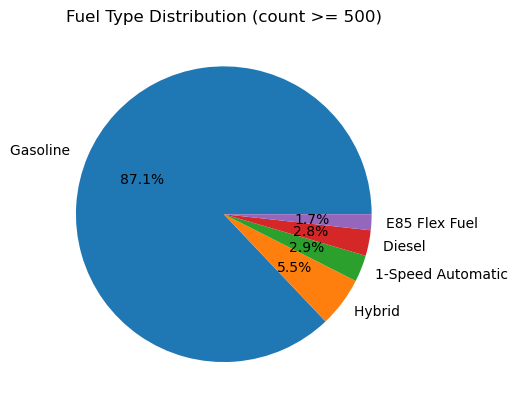

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose a feature to plot as a pie chart
feature_to_plot = 'Fuel_type'

# Get the count of each category
value_counts = df1[feature_to_plot].value_counts()

# Filter out categories with a count lower than X
X = 500
value_counts = value_counts[value_counts >= X]

# Create the pie chart
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')

# Add a title
plt.title('Fuel Type Distribution (count >= {})'.format(X))

# Show the plot
plt.show()


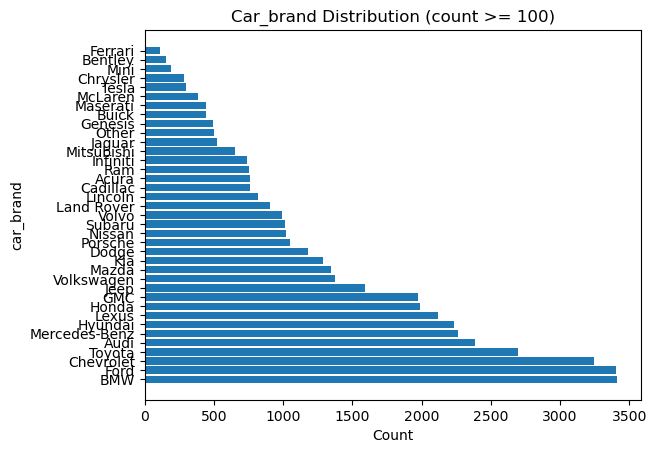

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose a feature to plot as a bar plot
feature_to_plot = 'car_brand'

# Get the count of each category
value_counts = df1[feature_to_plot].value_counts()

# Filter out categories with a count lower than X
X = 100
value_counts = value_counts[value_counts >= X]

# Create the bar plot
plt.barh(value_counts.index, value_counts)

# Add axis labels and a title
plt.xlabel('Count')
plt.ylabel(feature_to_plot)
plt.title('{} Distribution (count >= {})'.format(feature_to_plot.capitalize(), X))

# Show the plot
plt.show()


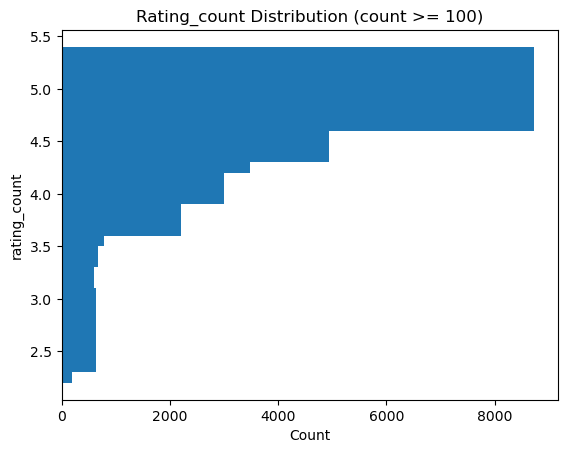

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Choose a feature to plot as a bar plot
feature_to_plot = 'rating_count'

# Get the count of each category
value_counts = df1[feature_to_plot].value_counts()

# Filter out categories with a count lower than X
X = 100
value_counts = value_counts[value_counts >= X]

# Create the bar plot
plt.barh(value_counts.index, value_counts)

# Add axis labels and a title
plt.xlabel('Count')
plt.ylabel(feature_to_plot)
plt.title('{} Distribution (count >= {})'.format(feature_to_plot.capitalize(), X))

# Show the plot
plt.show()


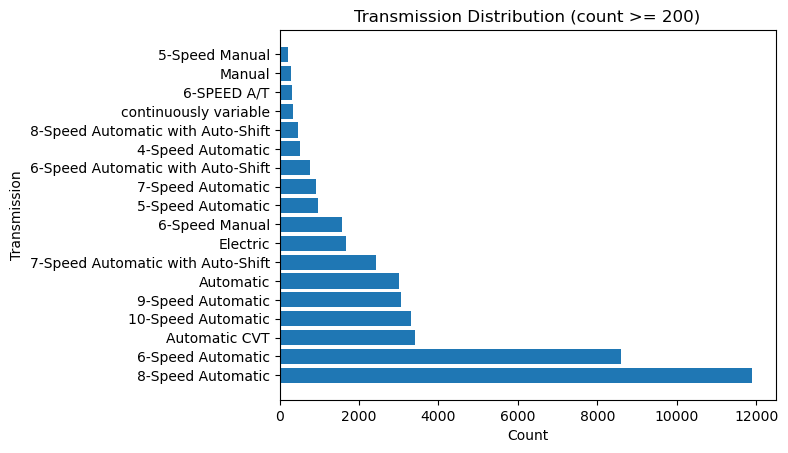

In [37]:

import pandas as pd
import matplotlib.pyplot as plt

# Choose a feature to plot as a bar plot
feature_to_plot = 'Transmission'

# Get the count of each category
value_counts = df1[feature_to_plot].value_counts()

# Filter out categories with a count lower than X
X = 200
value_counts = value_counts[value_counts >= X]

# Create the bar plot
plt.barh(value_counts.index, value_counts)
value_counts.index
# Add axis labels and a title
plt.xlabel('Count')
plt.ylabel(feature_to_plot)
plt.title('{} Distribution (count >= {})'.format(feature_to_plot.capitalize(), X))

# Show the plot
plt.show()


### EDA

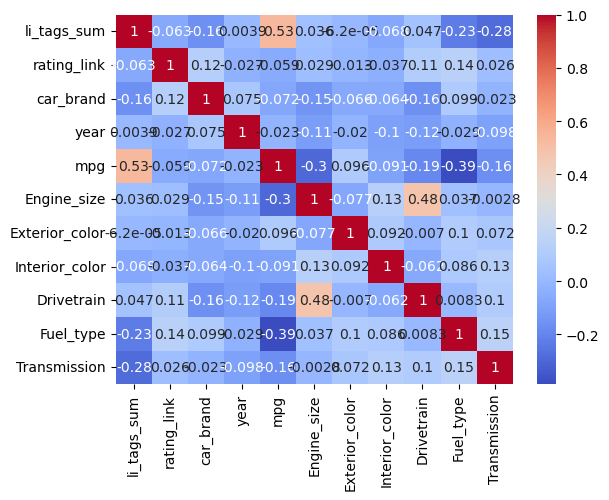

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "df"
features = ['li_tags_sum','rating_count','rating_link','car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']

# Select the three columns to show correlation
cols = ['li_tags_sum','rating_count','rating_link','car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']

corr = df[cols].corr()

# Plot a heatmap of the correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.savefig('heatmap.jpg', dpi=300)
plt.show()


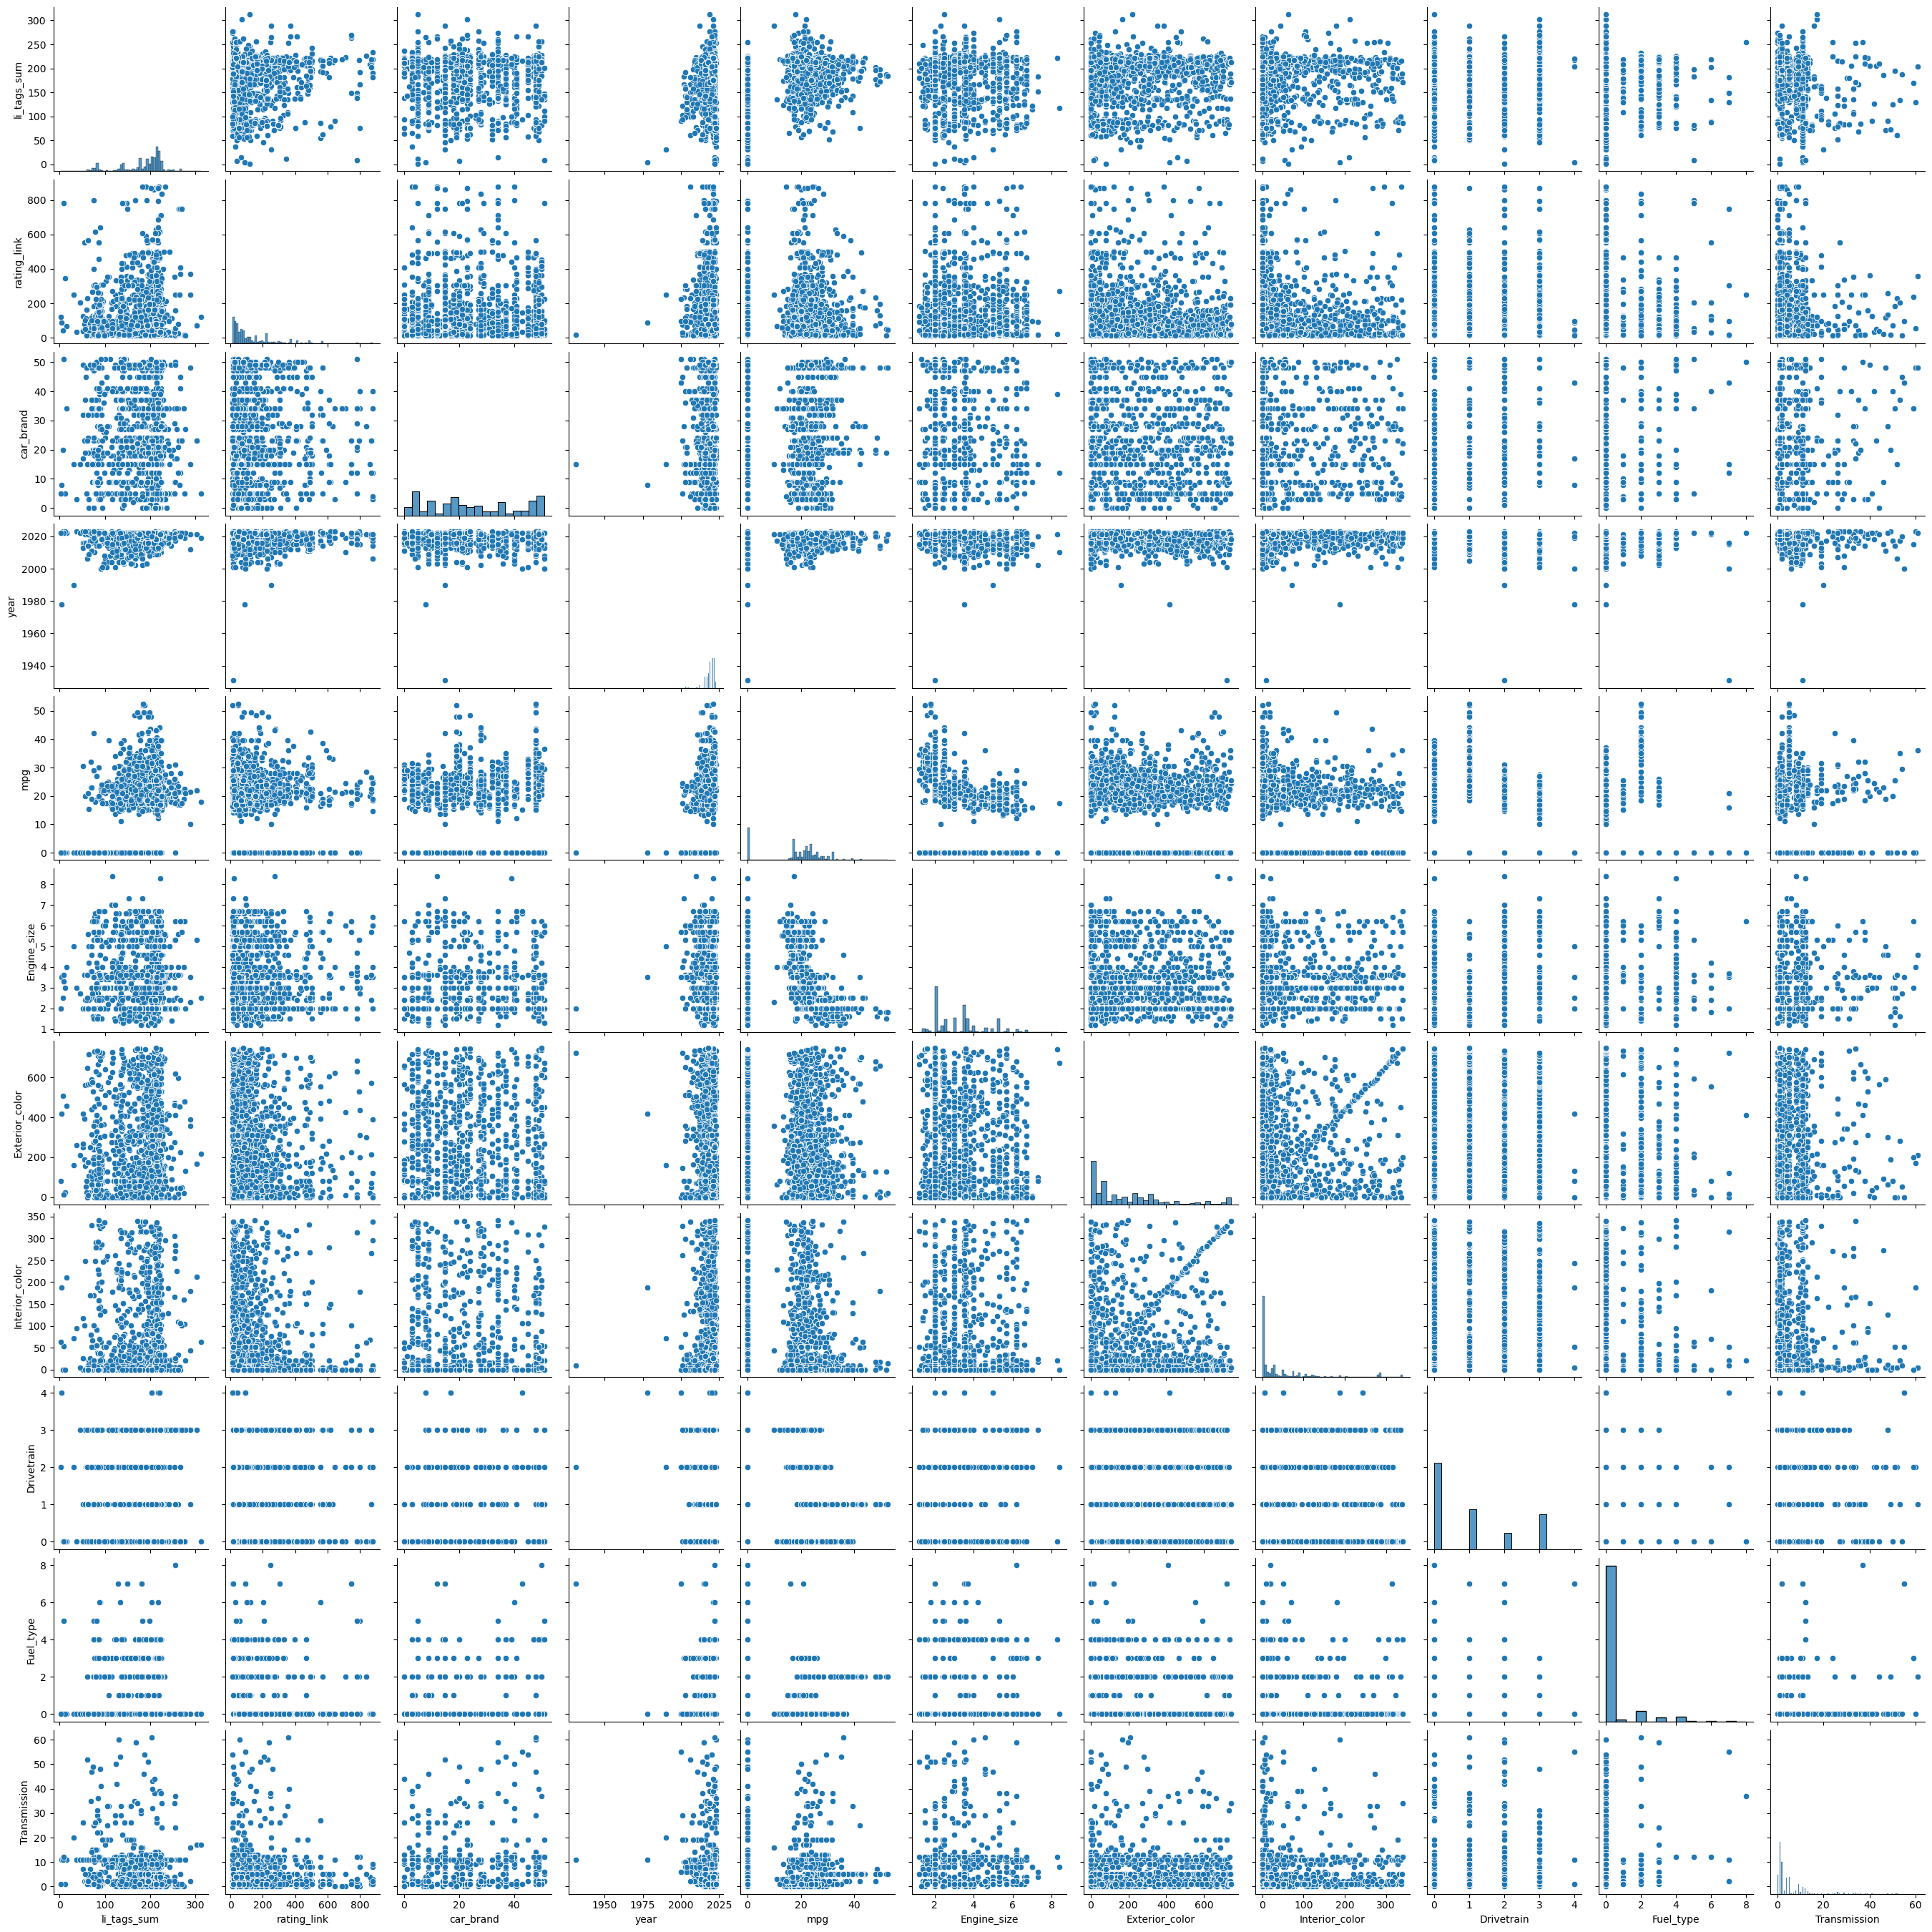

In [45]:
import pandas as pd
import seaborn as sns


features = ['li_tags_sum','rating_count','rating_link','car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']

# Select only the numeric columns for the scatter matrix plot
numeric_cols = ['li_tags_sum','rating_count','rating_link','car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
numeric_df = df[numeric_cols]

# Create the scatter matrix plot using seaborn
sns.pairplot(numeric_df)

# Save the plot as a jpeg file
plt.savefig('scatter_matrix.jpg', dpi=300)



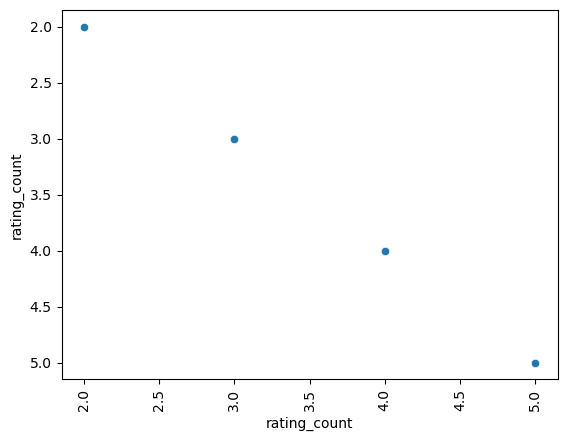

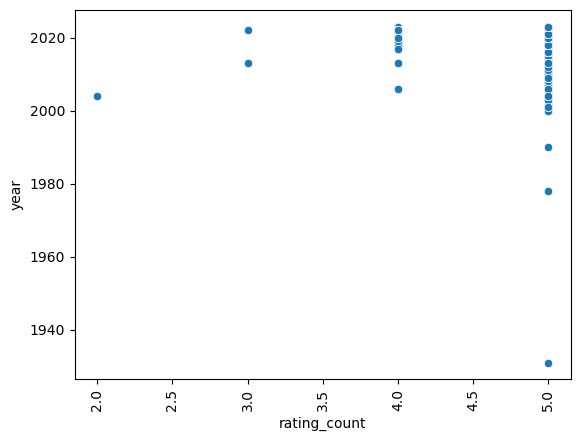

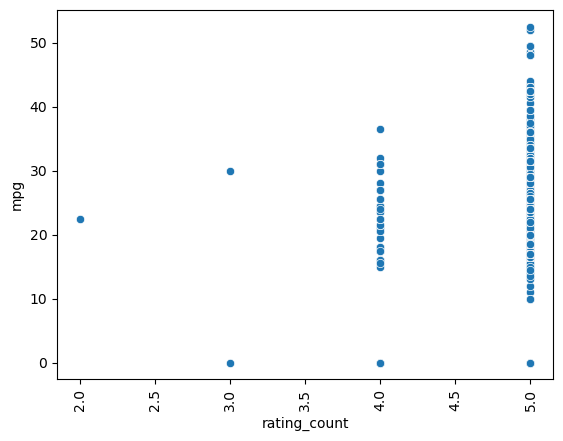

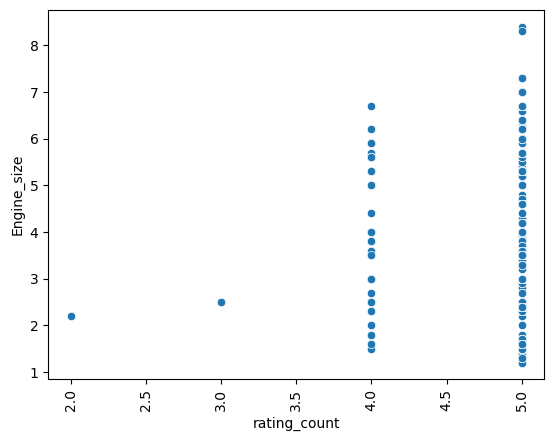

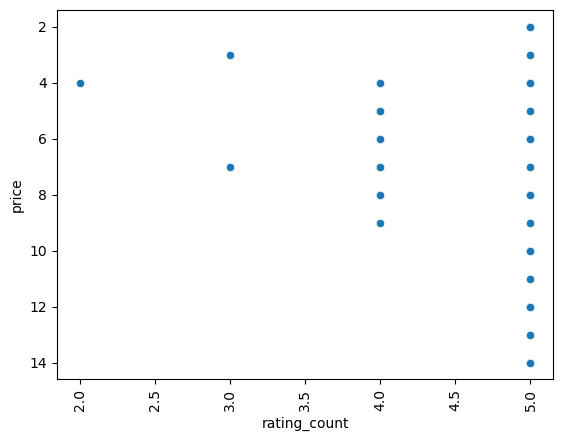

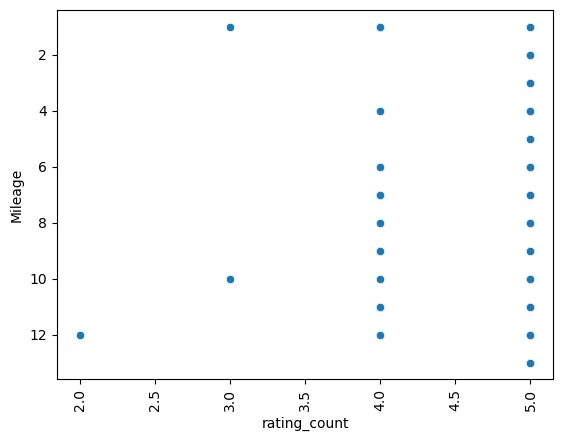

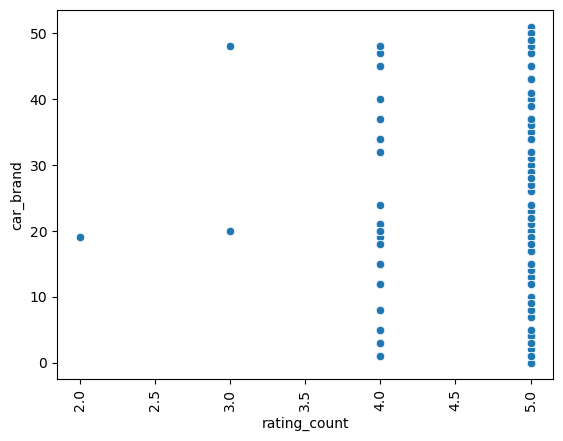

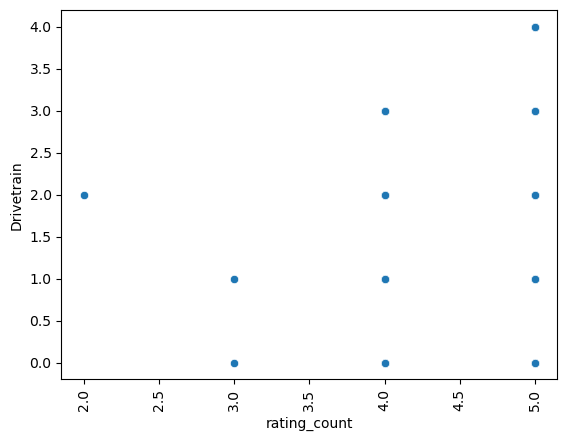

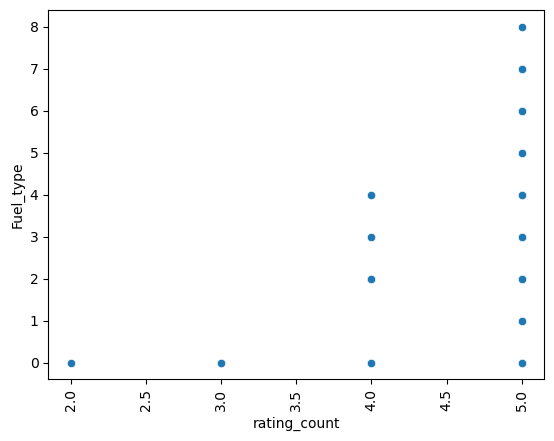

In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "df"
features = ['car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']

# Select only the numeric columns for the scatter matrix plot
numeric_cols = ['rating_count','year', 'mpg', 'Engine_size', 'price', 'Mileage','car_brand','Drivetrain','Fuel_type']
numeric_df = df[numeric_cols]

# Iterate through the columns of numeric_df and create a separate scatter plot for each column
for col in numeric_df.columns:
    sns.scatterplot(x='rating_count', y=col, data=numeric_df)
    plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
    plt.show()


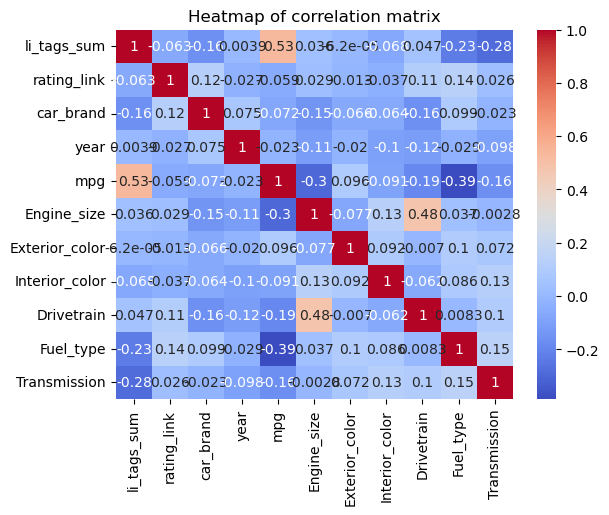

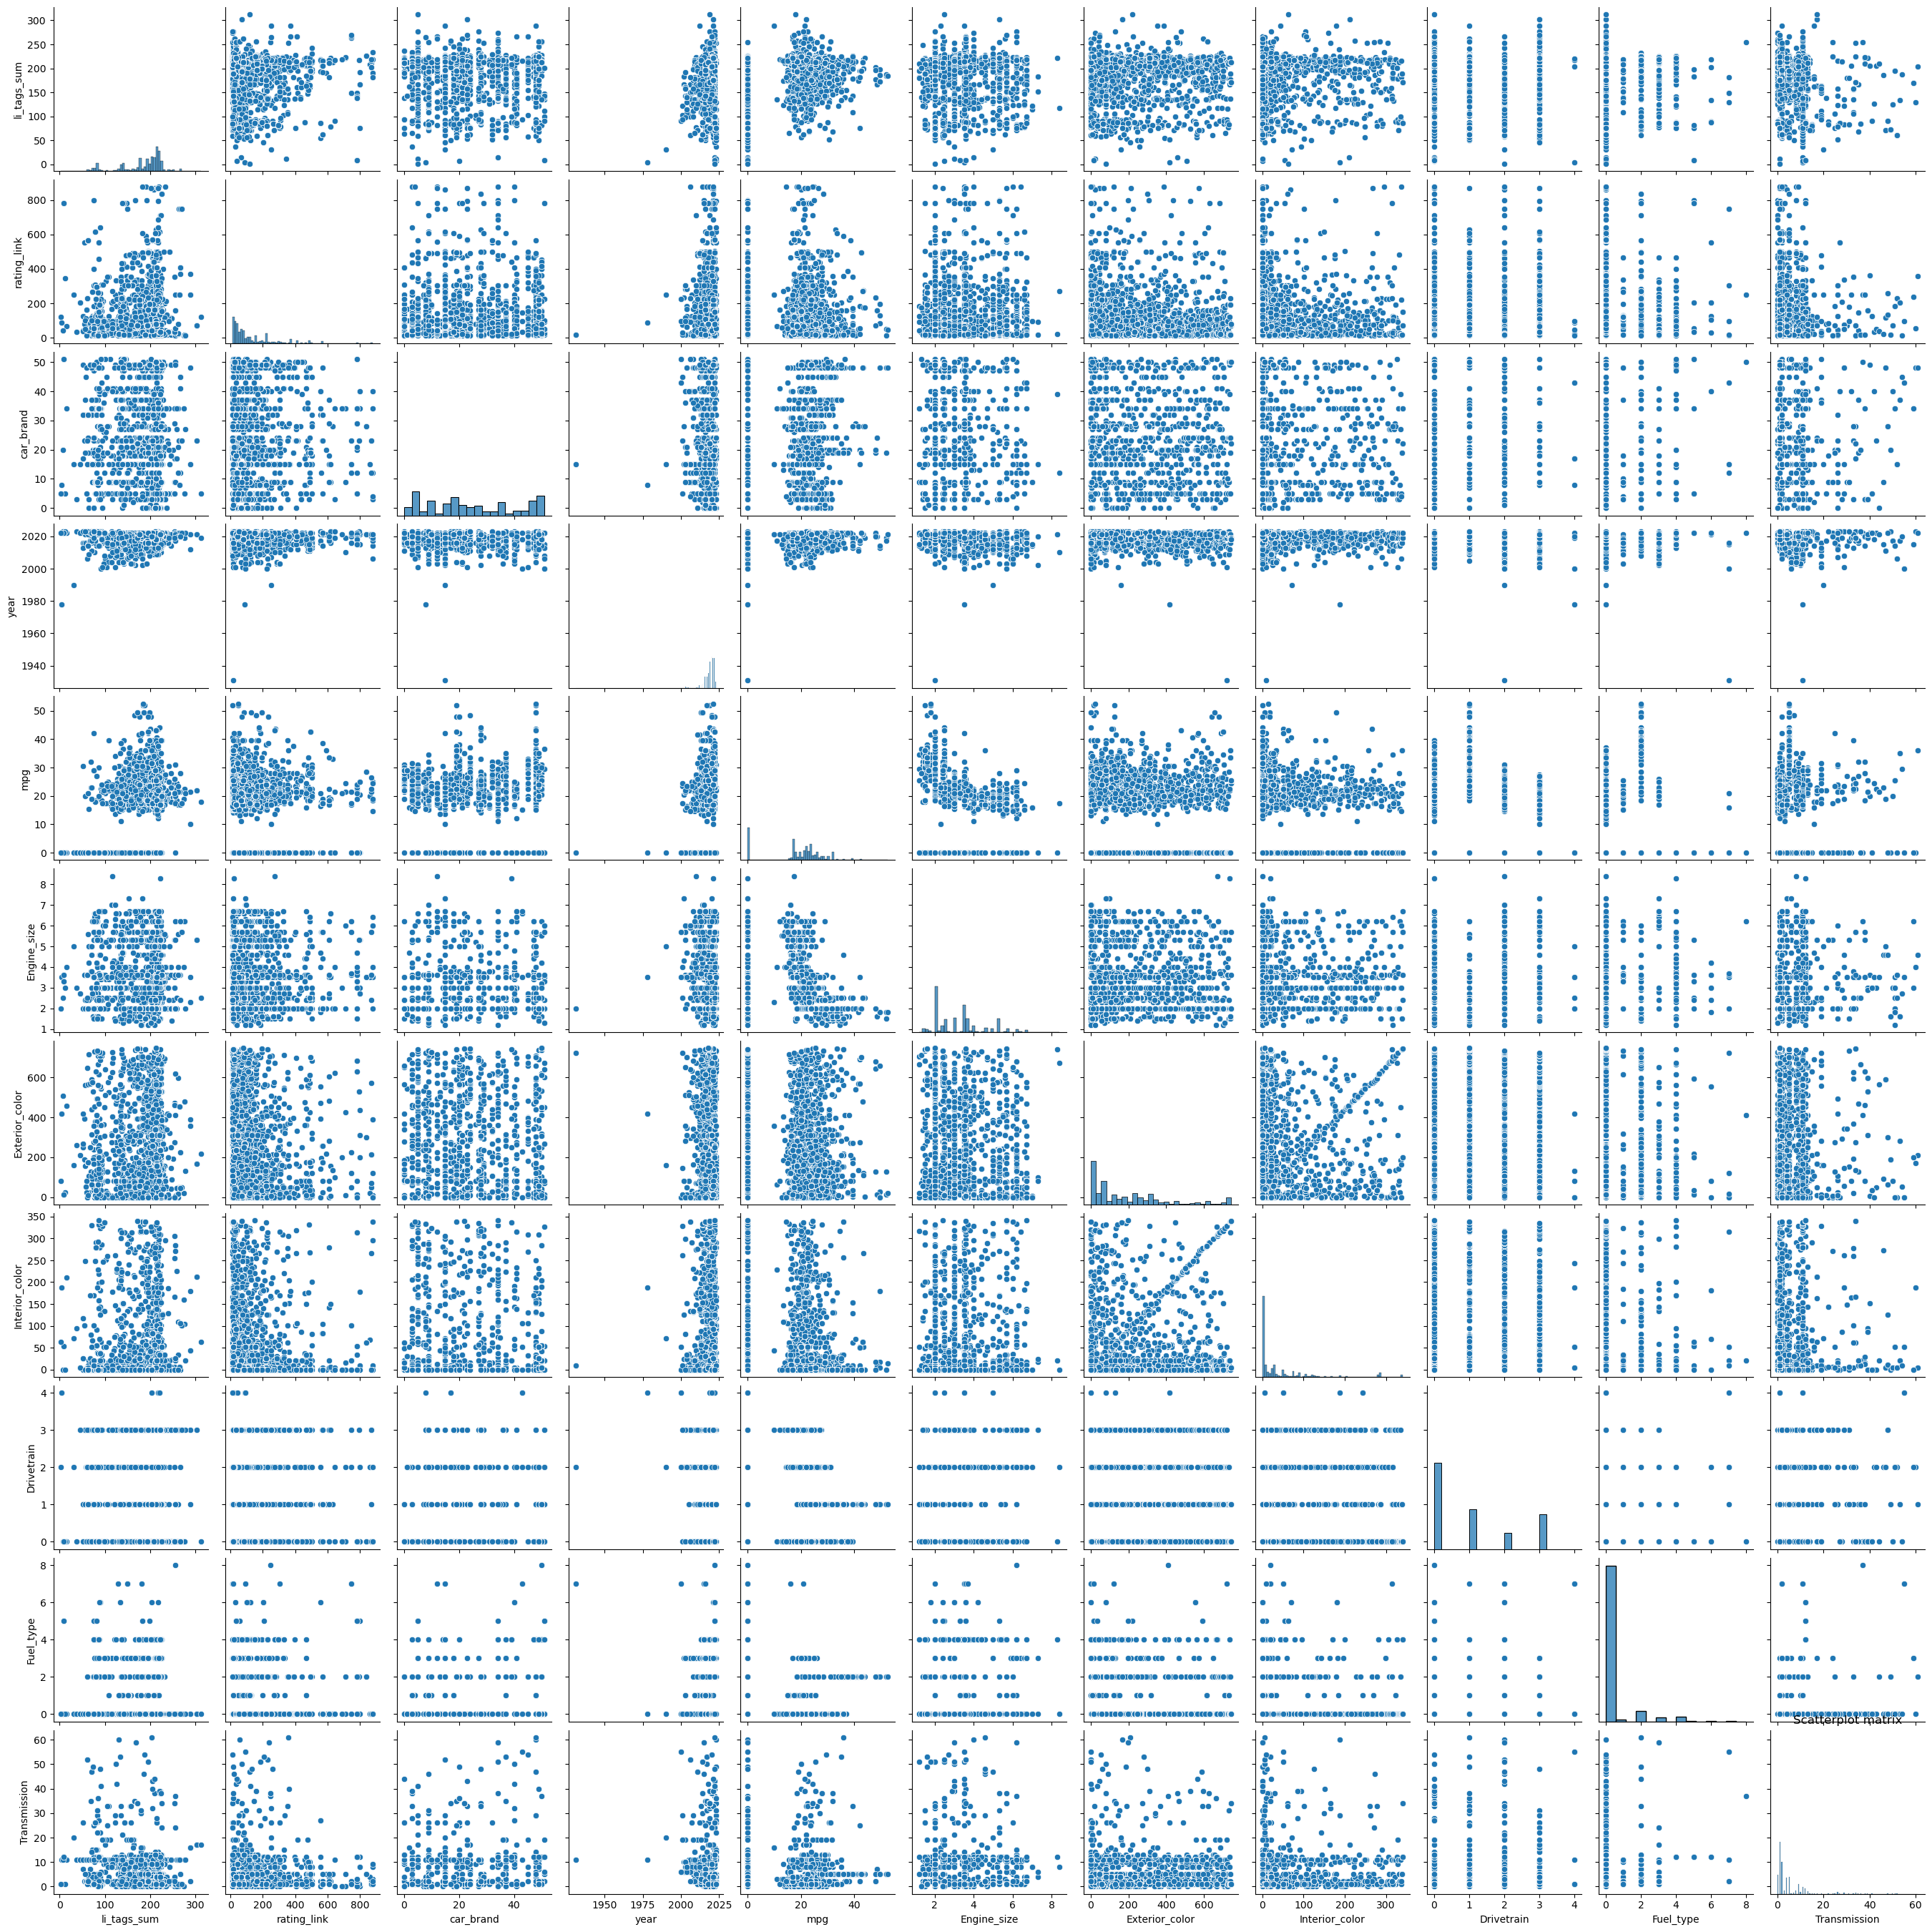

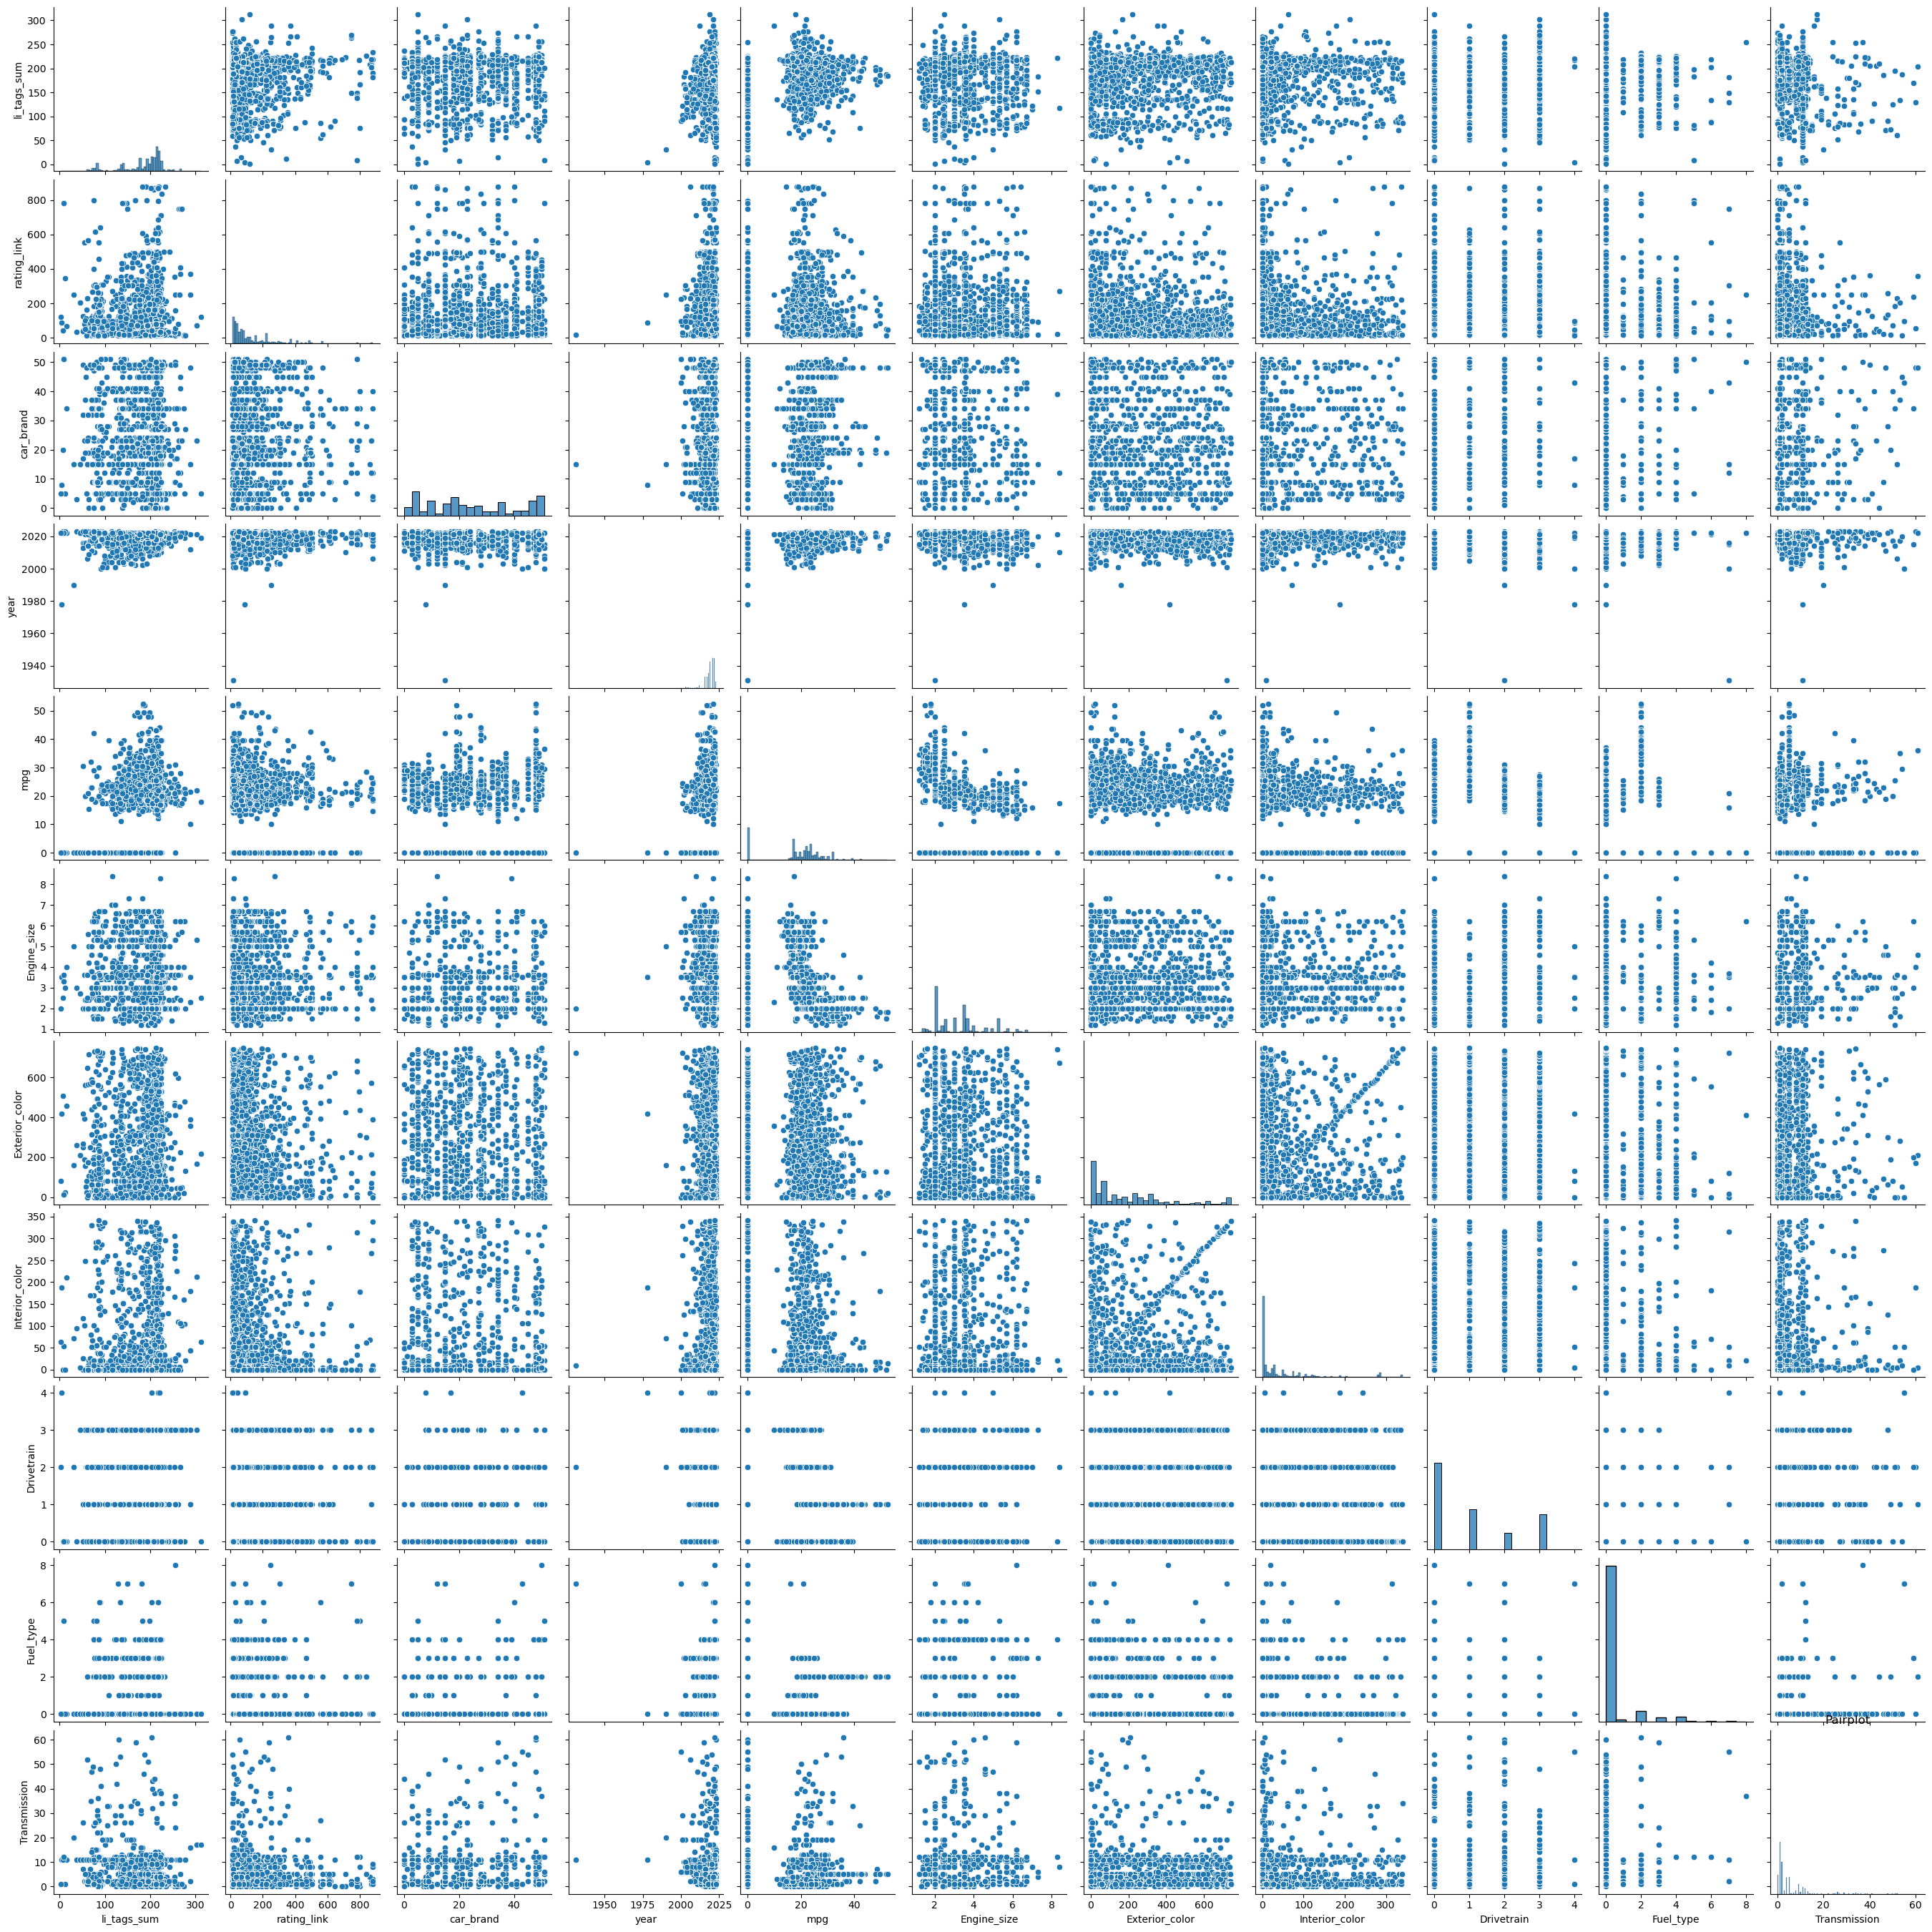

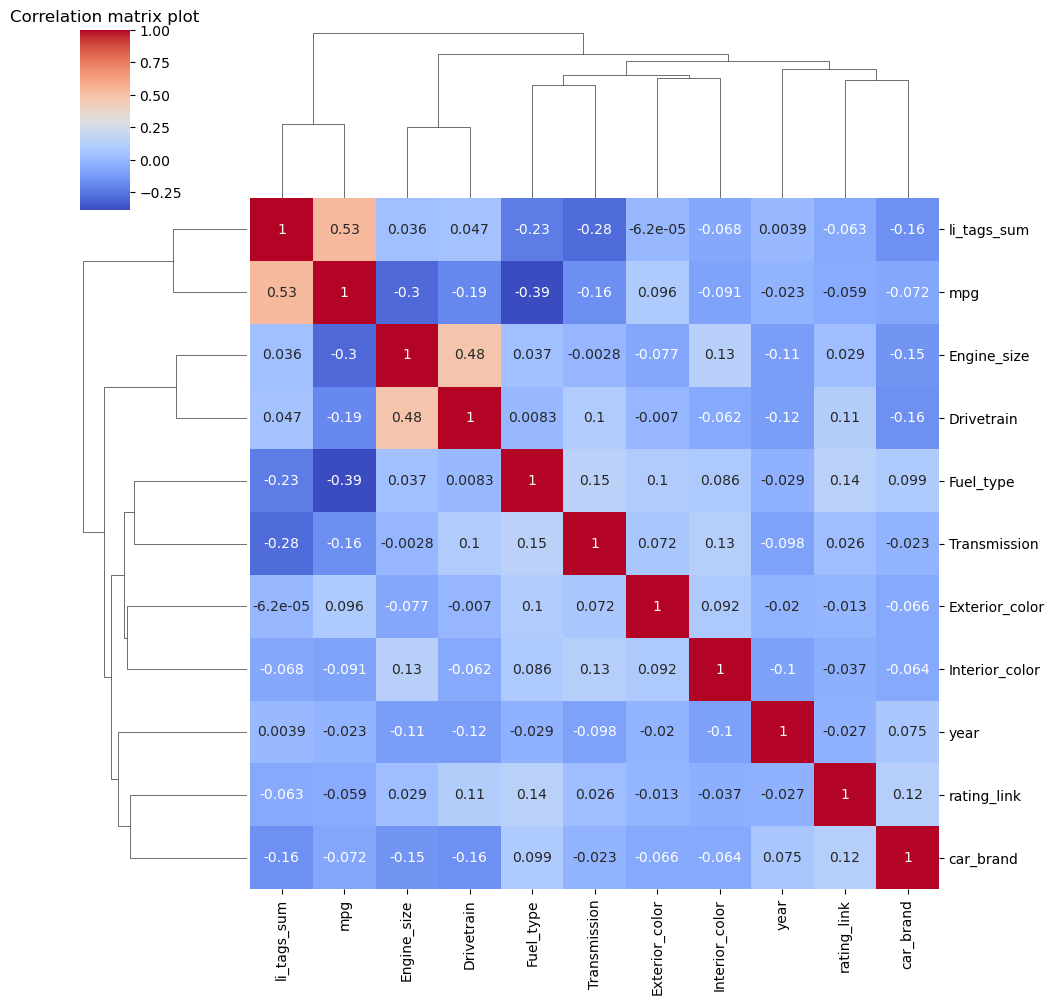

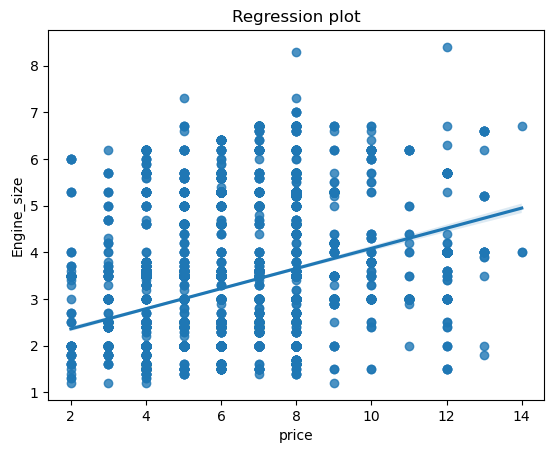

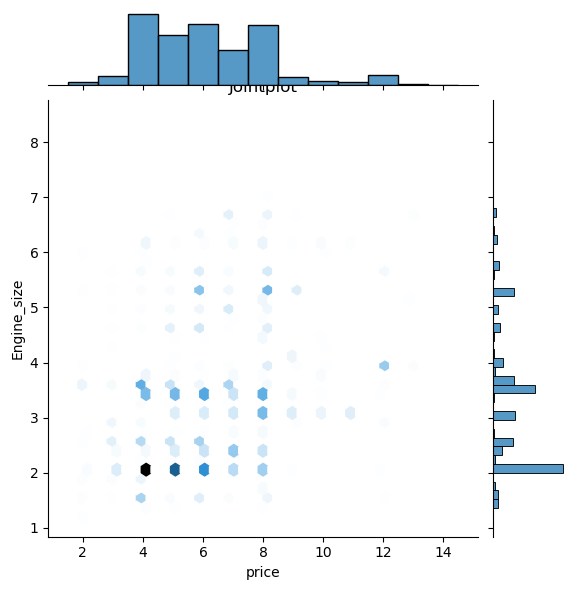

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named "df"
features = ['li_tags_sum','rating_count','rating_link','car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']

# Select the three columns to show correlation
cols = ['li_tags_sum','rating_count','rating_link','car_brand','year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']

# Compute correlation matrix
corr = df[cols].corr()

# Heatmap of correlation matrix
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Heatmap of correlation matrix')
plt.savefig('heatmap.jpg', dpi=300)
plt.show()

# Scatterplot matrix
sns.pairplot(df[cols])
plt.title('Scatterplot matrix')
plt.savefig('scatterplot_matrix.jpg', dpi=300)
plt.show()

# Pairplot
sns.pairplot(df[cols], diag_kind='hist')
plt.title('Pairplot')
plt.savefig('pairplot.jpg', dpi=300)
plt.show()

# Correlation matrix plot
sns.clustermap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation matrix plot')
plt.savefig('correlation_matrix.jpg', dpi=300)
plt.show()

# Regression plot
sns.regplot(x='price', y='Engine_size', data=df)
plt.title('Regression plot')
plt.savefig('regression_plot.jpg', dpi=300)
plt.show()

# Jointplot
sns.jointplot(x='price', y='Engine_size', data=df, kind='hex')
plt.title('Jointplot')
plt.savefig('jointplot.jpg', dpi=300)
plt.show()


### lets find the best TREE for us!

In [46]:
import itertools
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def process_combinations(features, df, max_depth=None):
    max_r2 = 0
    for i in range(len(features)):
        combinations = itertools.combinations(features, i+1)
        for combo in combinations:
            df1 = df.copy()
            r2 = process_combination(combo, df1, max_depth=max_depth)
            if r2 > max_r2:
                max_r2 = r2
    print(f'Coefficient of determination (R^2)_MAX_IS : {max_r2:.2f}')

def process_combination(combo, df, max_depth=None):
    # select the features to use as input variables
    features = list(combo)
    
    # drop rows with missing values
    df = df.dropna()
    
    # split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(df[features], df['rating_count'], test_size=0.5, random_state=42)
    
    # create and fit the decision tree model
    model = DecisionTreeRegressor(max_depth=max_depth)
    model.fit(X_train, y_train)
    
    # make predictions on the test set
    y_pred = model.predict(X_test)
    
    # evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'Features: {features}')
    print(f'Mean squared error: {mse:.2f}')
    print(f'Coefficient of determination (R^2): {r2:.2f}')
    
    return r2


In [47]:
features = ['car_brand','year', 'mpg','Engine_size','rating_link','price','Exterior_color','Interior_color','Drivetrain','Fuel_type','Transmission','Mileage']
df = df.dropna()
process_combinations(features,df)


Features: ['car_brand']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.05
Features: ['year']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.15
Features: ['mpg']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.06
Features: ['Engine_size']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.42
Features: ['rating_link']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.63
Features: ['price']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.01
Features: ['Exterior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.01
Features: ['Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.01
Features: ['Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.00
Features: ['Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.00
Features: ['Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0

Features: ['car_brand', 'mpg', 'Engine_size']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.08
Features: ['car_brand', 'mpg', 'rating_link']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.74
Features: ['car_brand', 'mpg', 'price']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['car_brand', 'mpg', 'Exterior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.12
Features: ['car_brand', 'mpg', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.62
Features: ['car_brand', 'mpg', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.67
Features: ['car_brand', 'mpg', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.42
Features: ['car_brand', 'mpg', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.89
Features: ['car_brand', 'mpg', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R

Features: ['year', 'price', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.49
Features: ['year', 'price', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.49
Features: ['year', 'price', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.58
Features: ['year', 'price', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.55
Features: ['year', 'Exterior_color', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.71
Features: ['year', 'Exterior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.27
Features: ['year', 'Exterior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.43
Features: ['year', 'Exterior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.59
Features: ['year', 'Exterior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of d

Features: ['Engine_size', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.29
Features: ['rating_link', 'price', 'Exterior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.23
Features: ['rating_link', 'price', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.46
Features: ['rating_link', 'price', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.92
Features: ['rating_link', 'price', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.16
Features: ['rating_link', 'price', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.05
Features: ['rating_link', 'price', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.52
Features: ['rating_link', 'Exterior_color', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.01
Features: ['rating_link', 'Exterior_color', 'Driv

Features: ['car_brand', 'year', 'rating_link', 'price']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.51
Features: ['car_brand', 'year', 'rating_link', 'Exterior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.23
Features: ['car_brand', 'year', 'rating_link', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.16
Features: ['car_brand', 'year', 'rating_link', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.10
Features: ['car_brand', 'year', 'rating_link', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.12
Features: ['car_brand', 'year', 'rating_link', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.31
Features: ['car_brand', 'year', 'rating_link', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.00
Features: ['car_brand', 'year', 'price', 'Exterior_color']
Mean squared error: 0.01
Coefficient of dete

Features: ['car_brand', 'Engine_size', 'rating_link', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.31
Features: ['car_brand', 'Engine_size', 'rating_link', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['car_brand', 'Engine_size', 'price', 'Exterior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.92
Features: ['car_brand', 'Engine_size', 'price', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.83
Features: ['car_brand', 'Engine_size', 'price', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.02
Features: ['car_brand', 'Engine_size', 'price', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.85
Features: ['car_brand', 'Engine_size', 'price', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.77
Features: ['car_brand', 'Engine_size', 'price', 'Mileage']
Mean squared error

Features: ['car_brand', 'Exterior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.50
Features: ['car_brand', 'Exterior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.86
Features: ['car_brand', 'Exterior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): 0.03
Features: ['car_brand', 'Exterior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.17
Features: ['car_brand', 'Exterior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.09
Features: ['car_brand', 'Exterior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.86
Features: ['car_brand', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.70
Features: ['car_brand', 'Interior_color', 'Drivet

Features: ['year', 'Engine_size', 'Interior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.69
Features: ['year', 'Engine_size', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.71
Features: ['year', 'Engine_size', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.93
Features: ['year', 'Engine_size', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.67
Features: ['year', 'Engine_size', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.83
Features: ['year', 'Engine_size', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.94
Features: ['year', 'Engine_size', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.45
Features: ['year', 'rating_link', 'price', 'Exterior_color']
Mean squared error: 0.01
Coefficient of d

Features: ['mpg', 'Engine_size', 'price', 'Exterior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.48
Features: ['mpg', 'Engine_size', 'price', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.74
Features: ['mpg', 'Engine_size', 'price', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.83
Features: ['mpg', 'Engine_size', 'price', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.79
Features: ['mpg', 'Engine_size', 'price', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.85
Features: ['mpg', 'Engine_size', 'price', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.05
Features: ['mpg', 'Engine_size', 'Exterior_color', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.92
Features: ['mpg', 'Engine_size', 'Exterior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (

Features: ['mpg', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.48
Features: ['mpg', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.26
Features: ['mpg', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.06
Features: ['mpg', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.82
Features: ['mpg', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.60
Features: ['mpg', 'Interior_color', 'Transmission', 'Mileage']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.99
Features: ['mpg', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.46
Features: ['mpg', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient

Features: ['Engine_size', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.59
Features: ['Engine_size', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.53
Features: ['Engine_size', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.21
Features: ['rating_link', 'price', 'Exterior_color', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.75
Features: ['rating_link', 'price', 'Exterior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): 0.04
Features: ['rating_link', 'price', 'Exterior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.19
Features: ['rating_link', 'price', 'Exterior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.10
Features: ['rating_link', 'price', 'Exterior_color', 'Mileage'

Features: ['Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.40
Features: ['Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.80
Features: ['Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.96
Features: ['Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.34
Features: ['Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.24
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'rating_link']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.90
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.06
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'E

Features: ['car_brand', 'year', 'Engine_size', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.64
Features: ['car_brand', 'year', 'Engine_size', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.63
Features: ['car_brand', 'year', 'Engine_size', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.74
Features: ['car_brand', 'year', 'Engine_size', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.92
Features: ['car_brand', 'year', 'rating_link', 'price', 'Exterior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.02
Features: ['car_brand', 'year', 'rating_link', 'price', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['car_brand', 'year', 'rating_link', 'price', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.19
Features: ['car_bran

Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.71
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.16
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.37
Features: ['car_brand', 'mpg', 'Engine_size', 'price', 'Exterior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.51
Features: ['car_brand', 'mpg', 'Engine_size', 'price', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.59
Features: ['car_brand', 'mpg', 'Engine_size', 'price', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.93
Features: ['car_brand', 'mpg', 'Engine_size', 'price', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.31
Features: ['car_brand', '

Features: ['car_brand', 'mpg', 'Exterior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.44
Features: ['car_brand', 'mpg', 'Exterior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.82
Features: ['car_brand', 'mpg', 'Exterior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.20
Features: ['car_brand', 'mpg', 'Exterior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.02
Coefficient of determination (R^2): -2.18
Features: ['car_brand', 'mpg', 'Exterior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.15
Features: ['car_brand', 'mpg', 'Exterior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.93
Features: ['car_brand', 'mpg', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.82

Features: ['car_brand', 'Engine_size', 'Exterior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.69
Features: ['car_brand', 'Engine_size', 'Exterior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.85
Features: ['car_brand', 'Engine_size', 'Exterior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.51
Features: ['car_brand', 'Engine_size', 'Exterior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['car_brand', 'Engine_size', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.85
Features: ['car_brand', 'Engine_size', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.19
Features: ['car_brand', 'Engine_size', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared

Features: ['car_brand', 'price', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.58
Features: ['car_brand', 'price', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.71
Features: ['car_brand', 'price', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.99
Features: ['car_brand', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.74
Features: ['car_brand', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.76
Features: ['car_brand', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.20
Features: ['car_brand', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coef

Features: ['year', 'mpg', 'price', 'Exterior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.51
Features: ['year', 'mpg', 'price', 'Exterior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.11
Features: ['year', 'mpg', 'price', 'Exterior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.15
Features: ['year', 'mpg', 'price', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.02
Features: ['year', 'mpg', 'price', 'Interior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.11
Features: ['year', 'mpg', 'price', 'Interior_color', 'Transmission']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.75
Features: ['year', 'mpg', 'price', 'Interior_color', 'Mileage']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.75
Features: ['year', 'mpg', 'price', 'Drivetrain', 'Fuel_type']
Mean

Features: ['year', 'Engine_size', 'price', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.91
Features: ['year', 'Engine_size', 'price', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.31
Features: ['year', 'Engine_size', 'price', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.31
Features: ['year', 'Engine_size', 'price', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.29
Features: ['year', 'Engine_size', 'price', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.17
Features: ['year', 'Engine_size', 'price', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.47
Features: ['year', 'Engine_size', 'Exterior_color', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.66
Features: ['year', 'Engine_

Features: ['year', 'rating_link', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.13
Features: ['year', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.46
Features: ['year', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.01
Features: ['year', 'price', 'Exterior_color', 'Interior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.42
Features: ['year', 'price', 'Exterior_color', 'Interior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.55
Features: ['year', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.53
Features: ['year', 'price', 'Exterior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.9

Features: ['mpg', 'Engine_size', 'price', 'Exterior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.91
Features: ['mpg', 'Engine_size', 'price', 'Exterior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.23
Features: ['mpg', 'Engine_size', 'price', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.70
Features: ['mpg', 'Engine_size', 'price', 'Interior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.59
Features: ['mpg', 'Engine_size', 'price', 'Interior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.54
Features: ['mpg', 'Engine_size', 'price', 'Interior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.74
Features: ['mpg', 'Engine_size', 'price', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.83
Features: ['mpg', 'En

Features: ['mpg', 'rating_link', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.02
Coefficient of determination (R^2): -2.31
Features: ['mpg', 'rating_link', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.28
Features: ['mpg', 'rating_link', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.49
Features: ['mpg', 'rating_link', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.33
Features: ['mpg', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.75
Features: ['mpg', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.84
Features: ['mpg', 'price', 'Exterior_color', 'Interior_color', 'Transmission']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.75
Featu

Features: ['Engine_size', 'rating_link', 'Exterior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.19
Features: ['Engine_size', 'rating_link', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.84
Features: ['Engine_size', 'rating_link', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.84
Features: ['Engine_size', 'rating_link', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.66
Features: ['Engine_size', 'rating_link', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.03
Features: ['Engine_size', 'rating_link', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.20
Features: ['Engine_size', 'rating_link', 'Interior_color', 'Transmission', 'Mileag

Features: ['rating_link', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.61
Features: ['rating_link', 'price', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.69
Features: ['rating_link', 'price', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.55
Features: ['rating_link', 'price', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.06
Features: ['rating_link', 'price', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.32
Features: ['rating_link', 'price', 'Interior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.33
Features: ['rating_link', 'price', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of 

Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.10
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.01
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.24
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.01
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'Exterior_color', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.05
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'Exterior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.60
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'Exterior_color', 'Fuel_type']
Mean squared error: 0.01
Coeffi

Features: ['car_brand', 'year', 'mpg', 'Exterior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.04
Features: ['car_brand', 'year', 'mpg', 'Exterior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.20
Features: ['car_brand', 'year', 'mpg', 'Exterior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.63
Features: ['car_brand', 'year', 'mpg', 'Exterior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.82
Features: ['car_brand', 'year', 'mpg', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.66
Features: ['car_brand', 'year', 'mpg', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.07
Features: ['car_brand', 'year', 'mpg', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared

Features: ['car_brand', 'year', 'Engine_size', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.90
Features: ['car_brand', 'year', 'Engine_size', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.91
Features: ['car_brand', 'year', 'Engine_size', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.69
Features: ['car_brand', 'year', 'Engine_size', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.82
Features: ['car_brand', 'year', 'Engine_size', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.78
Features: ['car_brand', 'year', 'Engine_size', 'Interior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.78
Features: ['car_brand', 'year', 'Engine_size',

Features: ['car_brand', 'year', 'price', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.98
Features: ['car_brand', 'year', 'price', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.32
Features: ['car_brand', 'year', 'price', 'Interior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.38
Features: ['car_brand', 'year', 'price', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.54
Features: ['car_brand', 'year', 'price', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.36
Features: ['car_brand', 'year', 'price', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.41
Features: ['car_brand', 'year', 'price', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared er

Features: ['car_brand', 'mpg', 'Engine_size', 'price', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.69
Features: ['car_brand', 'mpg', 'Engine_size', 'price', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.84
Features: ['car_brand', 'mpg', 'Engine_size', 'price', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.83
Features: ['car_brand', 'mpg', 'Engine_size', 'price', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.24
Features: ['car_brand', 'mpg', 'Engine_size', 'Exterior_color', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.55
Features: ['car_brand', 'mpg', 'Engine_size', 'Exterior_color', 'Interior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.37
Features: ['car_brand', 'mpg', 'Engine_size', 'Exterior_color', 'Interior_color', 

Features: ['car_brand', 'mpg', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.54
Features: ['car_brand', 'mpg', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.59
Features: ['car_brand', 'mpg', 'price', 'Exterior_color', 'Interior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.50
Features: ['car_brand', 'mpg', 'price', 'Exterior_color', 'Interior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.38
Features: ['car_brand', 'mpg', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.68
Features: ['car_brand', 'mpg', 'price', 'Exterior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.90
Features: ['car_brand', 'mpg', 'price', 'Exterior_color', 'Drivetra

Features: ['car_brand', 'Engine_size', 'rating_link', 'Exterior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.14
Features: ['car_brand', 'Engine_size', 'rating_link', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.32
Features: ['car_brand', 'Engine_size', 'rating_link', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['car_brand', 'Engine_size', 'rating_link', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.64
Features: ['car_brand', 'Engine_size', 'rating_link', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.49
Features: ['car_brand', 'Engine_size', 'rating_link', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.19
Feat

Features: ['car_brand', 'rating_link', 'price', 'Exterior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.24
Features: ['car_brand', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.37
Features: ['car_brand', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.64
Features: ['car_brand', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.64
Features: ['car_brand', 'rating_link', 'price', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.70
Features: ['car_brand', 'rating_link', 'price', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.55
Features: ['car_brand', 'rating_link', '

Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.33
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.74
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.37
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.87
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.78
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.96
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Mileage']

Features: ['year', 'mpg', 'rating_link', 'price', 'Interior_color', 'Mileage']
Mean squared error: 0.02
Coefficient of determination (R^2): -2.04
Features: ['year', 'mpg', 'rating_link', 'price', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.24
Features: ['year', 'mpg', 'rating_link', 'price', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.33
Features: ['year', 'mpg', 'rating_link', 'price', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.62
Features: ['year', 'mpg', 'rating_link', 'price', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.24
Features: ['year', 'mpg', 'rating_link', 'price', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.69
Features: ['year', 'mpg', 'rating_link', 'price', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^

Features: ['year', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.74
Features: ['year', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.19
Features: ['year', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.87
Features: ['year', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.87
Features: ['year', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Transmission']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.65
Features: ['year', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.37
Features: ['year', 'Engine_size', 'rating_link', 'price', 'Dr

Features: ['year', 'Engine_size', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.83
Features: ['year', 'Engine_size', 'Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.14
Features: ['year', 'Engine_size', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.02
Features: ['year', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.50
Features: ['year', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.11
Features: ['year', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Transmission']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.63
Features: ['year', 'rating_link', 'price', 'E

Features: ['year', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.98
Features: ['mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.74
Features: ['mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.14
Features: ['mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.60
Features: ['mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.64
Features: ['mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['mpg', 'Engine_size', 'rating_link', 'price', 'In

Features: ['mpg', 'Engine_size', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.92
Features: ['mpg', 'Engine_size', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.51
Features: ['mpg', 'Engine_size', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.28
Features: ['mpg', 'Engine_size', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['mpg', 'Engine_size', 'Exterior_color', 'Interior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.28
Features: ['mpg', 'Engine_size', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.29
Features: ['mpg', 'Engin

Features: ['mpg', 'price', 'Exterior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.28
Features: ['mpg', 'price', 'Exterior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['mpg', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.86
Features: ['mpg', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.90
Features: ['mpg', 'price', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.02
Coefficient of determination (R^2): -2.14
Features: ['mpg', 'price', 'Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.02
Coefficient of determination (R^2): -2.20
Features: ['mpg', 'price', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean

Features: ['Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.64
Features: ['Engine_size', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.64
Features: ['Engine_size', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.19
Features: ['Engine_size', 'price', 'Exterior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.46
Features: ['Engine_size', 'price', 'Exterior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.60
Features: ['Engine_size', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.53
Features: ['Engine_size', 'pri

Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.42
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.23
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.51
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'rating_link', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.92
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'rating_link', 'Interior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.83
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'rating_link', 'Interior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2):

Features: ['car_brand', 'year', 'mpg', 'rating_link', 'price', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.34
Features: ['car_brand', 'year', 'mpg', 'rating_link', 'price', 'Interior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.93
Features: ['car_brand', 'year', 'mpg', 'rating_link', 'price', 'Interior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.94
Features: ['car_brand', 'year', 'mpg', 'rating_link', 'price', 'Interior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.80
Features: ['car_brand', 'year', 'mpg', 'rating_link', 'price', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.51
Features: ['car_brand', 'year', 'mpg', 'rating_link', 'price', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.67
Features: ['car_brand', 'year', 'mpg'

Features: ['car_brand', 'year', 'mpg', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.59
Features: ['car_brand', 'year', 'mpg', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.93
Features: ['car_brand', 'year', 'mpg', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.31
Features: ['car_brand', 'year', 'mpg', 'Exterior_color', 'Interior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.62
Features: ['car_brand', 'year', 'mpg', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.00
Features: ['car_brand', 'year', 'mpg', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.7

Features: ['car_brand', 'year', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.55
Features: ['car_brand', 'year', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['car_brand', 'year', 'Engine_size', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.74
Features: ['car_brand', 'year', 'Engine_size', 'price', 'Exterior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['car_brand', 'year', 'Engine_size', 'price', 'Exterior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.74
Features: ['car_brand', 'year', 'Engine_size', 'price', 'Exterior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determi

Features: ['car_brand', 'year', 'rating_link', 'price', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.55
Features: ['car_brand', 'year', 'rating_link', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.20
Features: ['car_brand', 'year', 'rating_link', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.51
Features: ['car_brand', 'year', 'rating_link', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.64
Features: ['car_brand', 'year', 'rating_link', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.70
Features: ['car_brand', 'year', 'rating_link', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error:

Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'price', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.64
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.19
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Interior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.55
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Interior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): 0.04
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Interior_color', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.10
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0

Features: ['car_brand', 'mpg', 'Engine_size', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.96
Features: ['car_brand', 'mpg', 'Engine_size', 'Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.24
Features: ['car_brand', 'mpg', 'Engine_size', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.70
Features: ['car_brand', 'mpg', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.10
Features: ['car_brand', 'mpg', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['car_brand', 'mpg', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Transmission']
Mean squared error: 0.01
Coefficient of 

Features: ['car_brand', 'mpg', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.21
Features: ['car_brand', 'mpg', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.42
Features: ['car_brand', 'mpg', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.71
Features: ['car_brand', 'mpg', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.61
Features: ['car_brand', 'mpg', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.35
Features: ['car_brand', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
C

Features: ['car_brand', 'Engine_size', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.89
Features: ['car_brand', 'Engine_size', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.14
Features: ['car_brand', 'Engine_size', 'price', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['car_brand', 'Engine_size', 'price', 'Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.26
Features: ['car_brand', 'Engine_size', 'price', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.47
Features: ['car_brand', 'Engine_size', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error:

Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.06
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.28
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.28
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.69
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Interior_color', 'Drivetrain']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.87
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Interior_color', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.10
Features: ['year', 'mp

Features: ['year', 'mpg', 'Engine_size', 'Exterior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.06
Features: ['year', 'mpg', 'Engine_size', 'Exterior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.83
Features: ['year', 'mpg', 'Engine_size', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.88
Features: ['year', 'mpg', 'Engine_size', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.79
Features: ['year', 'mpg', 'Engine_size', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.96
Features: ['year', 'mpg', 'Engine_size', 'Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.74
F

Features: ['year', 'mpg', 'price', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.36
Features: ['year', 'mpg', 'price', 'Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.90
Features: ['year', 'mpg', 'price', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.48
Features: ['year', 'mpg', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.87
Features: ['year', 'mpg', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.92
Features: ['year', 'mpg', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.33
Features: ['ye

Features: ['year', 'Engine_size', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.69
Features: ['year', 'Engine_size', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['year', 'Engine_size', 'price', 'Exterior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.64
Features: ['year', 'Engine_size', 'price', 'Exterior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.78
Features: ['year', 'Engine_size', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.30
Features: ['year', 'Engine_size', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R

Features: ['mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.37
Features: ['mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.14
Features: ['mpg', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.55
Features: ['mpg', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.83
Features: ['mpg', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination

Features: ['mpg', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.37
Features: ['mpg', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.92
Features: ['mpg', 'rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['mpg', 'rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.19
Features: ['mpg', 'rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.47
Features: ['mpg', 'rating_link', 'price', 'Exterior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R

Features: ['rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.55
Features: ['rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.88
Features: ['rating_link', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.28
Features: ['rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.15
Features: ['rating_link', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.42
Features: ['rating_link', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mea

Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.42
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.28
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.52
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.90
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.92
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared erro

Features: ['car_brand', 'year', 'mpg', 'rating_link', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.79
Features: ['car_brand', 'year', 'mpg', 'rating_link', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.55
Features: ['car_brand', 'year', 'mpg', 'rating_link', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.02
Coefficient of determination (R^2): -1.83
Features: ['car_brand', 'year', 'mpg', 'rating_link', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.28
Features: ['car_brand', 'year', 'mpg', 'rating_link', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.84
Features: ['car_brand', 'year', 'mpg', 'rating_link', 'Exterior_color', 'Interio

Features: ['car_brand', 'year', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.01
Features: ['car_brand', 'year', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.06
Features: ['car_brand', 'year', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.69
Features: ['car_brand', 'year', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.01
Features: ['car_brand', 'year', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.96
Features: ['car_brand', 'year', 'Engine_size', 'rating_link', 'price', 'Interior_colo

Features: ['car_brand', 'year', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['car_brand', 'year', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.51
Features: ['car_brand', 'year', 'rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.42
Features: ['car_brand', 'year', 'rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.46
Features: ['car_brand', 'year', 'rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['car_brand', 'year', 'rating_link', 'price', 'Exterior_color', 'Fuel_type',

Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.64
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.51
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.23
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.28
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.69
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Interior

Features: ['car_brand', 'mpg', 'rating_link', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.30
Features: ['car_brand', 'mpg', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.67
Features: ['car_brand', 'mpg', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.80
Features: ['car_brand', 'mpg', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.10
Features: ['car_brand', 'mpg', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.80
Features: ['car_brand', 'mpg', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_typ

Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.01
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.32
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.74
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.01
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.01
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type']
Mean 

Features: ['year', 'mpg', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.42
Features: ['year', 'mpg', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.93
Features: ['year', 'mpg', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.15
Features: ['year', 'mpg', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.83
Features: ['year', 'mpg', 'rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.15
Features: ['year', 'mpg', 'rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Mileage']

Features: ['year', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.74
Features: ['year', 'Engine_size', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.96
Features: ['year', 'Engine_size', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.10
Features: ['year', 'Engine_size', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.00
Features: ['year', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.60
Features: ['year', 'rating_link', 'price', 'Exterior_color', 'Interior

Features: ['Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.92
Features: ['Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.32
Features: ['Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.83
Features: ['Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.42
Features: ['Engine_size', 'rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.19
Features: ['Engine_size', 'rating_lin

Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.78
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.64
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.92
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.06
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'price', 'Exterior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.28
Features: ['car_brand', 'year', 'mpg', 'Engine_size

Features: ['car_brand', 'year', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.23
Features: ['car_brand', 'year', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.55
Features: ['car_brand', 'year', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.42
Features: ['car_brand', 'year', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.42
Features: ['car_brand', 'year', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.32
Featu

Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.46
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.60
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.69
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'price', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.46
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.37
Features: ['car_br

Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.83
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.24
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Interior_color', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.87
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.69
Features: ['year', 'mpg', 'Engine_size', 'rating_link', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -1.06
Features: ['year', 'mpg', 'Engine_size', 'r

Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.92
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.69
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.55
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.83
Features: ['car_brand', 'year', 'mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Transmission', 'Mileage']
Mean squared error: 0.01
Co

Features: ['car_brand', 'year', 'Engine_size', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.10
Features: ['car_brand', 'year', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.92
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Transmission']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.42
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Fuel_type', 'Mileage']
Mean squared error: 0.01
Coefficient of determination (R^2): -0.64
Features: ['car_brand', 'mpg', 'Engine_size', 'rating_link', 'price', 'Exterior_color', 'Interior_color', 'Drivetrain', 'Transmission', 'Mileage']


### changing 
all number of reviews

 Features: ['car_brand', 'year', 'rating_link', 'price', 'Transmission', 'Mileage']
 Mean squared error: 0.01
 Coefficient of determination (R^2): 0.31

### changing 
 number of reviews >10 

Features: ['year', 'Engine_size', 'rating_link', 'Mileage']
Mean squared error: 0.00
Coefficient of determination (R^2): 0.36

In [49]:
df

car_name  car_brand  year price  \
1                   2019 Lexus ES 350 ES 350 Luxury         28  2019     6   
10                           2013 Ford Edge Limited         15  2013     2   
11             2021 INFINITI Q50 3.0t Red Sport 400         21  2021     7   
15     2019 Volkswagen Tiguan 2.0T SEL R-Line Black         49  2019     5   
33                               2021 GMC Yukon SLT         18  2021     8   
...                                             ...        ...   ...   ...   
46058                          2023 Kia Carnival LX         24  2023     8   
46076                          2023 Kia Carnival LX         24  2023     8   
46098                          2023 Kia Carnival LX         24  2023     8   
46114                          2023 Kia Carnival LX         24  2023     8   
46134                          2023 Kia Carnival LX         24  2023     8   

      rating_count  rating_link  Exterior_color  Interior_color  Drivetrain  \
1                5           79               1               1           1   
10               5          285               3               3           0   
11               5           40               4               4           2   
15               5           85               5               0           0   
33               5           16               6               6           2   
...            ...          ...             ...             ...         ...   
46058            5           54             356               9           1   
46076            5           54             356               9           1   
46098            5           54             356               9           1   
46114            5           54             356               9           1   
46134            5           54             356               9           1   

        mpg  Fuel_type  Transmission                           Engine  \
1       0.0          0             1             3.5L V6 24V PDI DOHC   
10     21.5          0             2            3.5L V6 24V MPFI DOHC   
11     23.0          0             3  3.0L V6 24V GDI DOHC Twin Turbo   
15     25.0          0             1       2.0L I4 16V GDI DOHC Turbo   
33     18.0          0             4              5.3L V8 16V GDI OHV   
...     ...        ...           ...                              ...   
46058   0.0          0             1             3.5L V6 24V PDI DOHC   
46076   0.0          0             1             3.5L V6 24V PDI DOHC   
46098   0.0          0             1             3.5L V6 24V PDI DOHC   
46114   0.0          0             1             3.5L V6 24V PDI DOHC   
46134   0.0          0             1             3.5L V6 24V PDI DOHC   

       Engine_size Mileage  li_tags_sum  
1              3.5       6        200.0  
10             3.5      13        205.0  
11             3.0       3        215.0  
15             2.0       3        212.0  
33             5.3       8        220.0  
...            ...     ...          ...  
46058          3.5       1         75.0  
46076          3.5       1         75.0  
46098          3.5       1         75.0  
46114          3.5       1         75.0  
46134          3.5       1         75.0  

[7637 rows x 16 columns]